__DATA__

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()


In [2]:
import train.train as train
import common.utils as utils
import common.model as model
import inference.encode as encode
import os 
import re
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

ROOT_DIR = 'F:/' #TODO: change
OUT_DIR = os.path.join(ROOT_DIR, 'checkpoints//aec')
data_path = os.path.join(ROOT_DIR, 'kt_dataset_dicom')

train_files_list = ROOT_DIR + 'dicom_train_list.txt'
val_files_list = ROOT_DIR + 'dicom_val_list.txt'

BATCH = 32
EPOCHS = 100
IMG_SHAPE = (256, 256,1)
MODEL_TYPE = 5 #2d deeper model

print(data_path)

dicom_files_id = os.listdir(data_path)
# train_files = utils.get_all_CT_filenames_to_load(data_path)

F:/kt_dataset_dicom


In [29]:
# print(len(dicom_files_id))
# print(dicom_files_id[0])

1371
M41_38484178-a21a-5d06-fbcc-791a43a4bc42


In [21]:
# usable_files_id, unusable_files_id = train_test_split(dicom_files_id, test_size=0.5, random_state=42)
# train_files_id, val_files_id = train_test_split(usable_files_id, test_size=0.2, random_state=42)


In [22]:
# print(len(train_files_id))
# print(len(val_files_id))

548
137


In [67]:
def get_2d_data_list(path_to_dicom, dicom_list, text_file):
    file = open(text_file, 'w')
    
    for patient in dicom_list:
        patient_path = os.path.join(path_to_dicom, patient)
        date = os.listdir(patient_path)[0]
        slices = os.listdir(os.path.join(patient_path, date))
        # print(patient)
        if(re.split('_|\.', slices[0])[0] == re.split('_|\.', slices[-1])[0]):
            slice_index_list = []
            for slice in glob(patient_path + '/*/*'):
                slice_name = os.path.basename(slice)
                slice_name = re.split('_|\.', slice_name)
                slice_prefix = slice_name[0]
                slice_index = slice_name[1]
                slice_index_list.append(int(slice_index))
                
            slice_index_list.sort()
            n = len(slice_index_list)

            for index in range(slice_index_list[0] + int(0.4*n), slice_index_list[-1] - int(0.4*n)):
                file.write(str(patient + '/' + date  + '/' + slice_prefix + '_' + str(index) + '.dcm' + '\n'))


In [57]:
val_file_id = open('F:/val_list_id.txt', 'r')
val_files_id = []

for line in val_file_id.readlines():
    val_files_id.append(line.split('\n')[0])

In [70]:
get_2d_data_list(data_path, val_files_id, 'F:/half_sized_val_list.txt') 

In [72]:
get_2d_data_list(data_path, train_files_id, train_files_list) 

In [39]:
# #we already have txt files with nessesary insormation
# get_2d_data_list(data_path, train_files_id_2, train_files_list) 
# get_2d_data_list(data_path, val_files_id_2, val_files_list)

In [3]:
train_file = open(train_files_list, 'r')
val_file = open('F:/half_sized_val_list.txt', 'r')
train_files = []
val_files = []

for line in train_file.readlines():
    train_files.append(data_path + '/' + line.split('\n')[0])
    
for line in val_file.readlines():
    val_files.append(data_path + '/' + line.split('\n')[0])

In [4]:
print(len(train_files))
print(len(val_files))
print(val_files[0])

3617
915
F:/kt_dataset_dicom/F18_c4415d1b-9ae7-d12d-0d45-3ef43d1aa192/20060925/2_45.dcm


__TRAINING__

In [8]:
checkpoint_path_both = train.train_model(train_files, val_files, in_weights_path=None, EPOCHS=EPOCHS, out_dir=OUT_DIR, model_type=MODEL_TYPE, BATCH=BATCH, IMG_SHAPE=IMG_SHAPE)

c:\users\serge\appdata\local\programs\python\python36\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1

67 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_33.dcm
68 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_34.dcm
69 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_35.dcm
70 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_36.dcm
71 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_37.dcm
72 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_38.dcm
73 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_39.dcm
74 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_40.dcm
75 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_41.dcm
76 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_42.dcm
77 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_43.dcm
78 G:/kt_dataset_dicom/F22_8af31cfb-d916-7d61-6181-fd77f976ab4a/20061019/2_44.dcm
79 G:/kt_dataset

176 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_37.dcm
177 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_38.dcm
178 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_39.dcm
179 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_40.dcm
180 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_41.dcm
181 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_42.dcm
182 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_43.dcm
183 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_44.dcm
184 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_45.dcm
185 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_46.dcm
186 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_47.dcm
187 G:/kt_dataset_dicom/M41_0a5014e2-8ad7-7b71-e9b6-18fb7b321eb8/20070508/2_48.dcm
188 

283 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_77.dcm
284 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_78.dcm
285 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_79.dcm
286 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_80.dcm
287 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_81.dcm
288 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_82.dcm
289 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_83.dcm
290 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_84.dcm
291 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_85.dcm
292 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_86.dcm
293 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_87.dcm
294 G:/kt_dataset_dicom/M21_14662474-1b71-b77b-8309-b1d6f5026b84/20070130/2_88.dcm
295 

390 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_45.dcm
391 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_46.dcm
392 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_47.dcm
393 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_48.dcm
394 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_49.dcm
395 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_50.dcm
396 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_51.dcm
397 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_52.dcm
398 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_53.dcm
399 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_54.dcm
400 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_55.dcm
401 G:/kt_dataset_dicom/M41_39d0937f-69b2-845e-a497-faf9305a6c9b/20060801/2_56.dcm
402 

497 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_44.dcm
498 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_45.dcm
499 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_46.dcm
500 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_47.dcm
501 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_48.dcm
502 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_49.dcm
503 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_50.dcm
504 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_51.dcm
505 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_52.dcm
506 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_53.dcm
507 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_54.dcm
508 G:/kt_dataset_dicom/F21_bfbaee5b-8944-5a0d-ce94-3b108cdb6441/20060807/2_55.dcm
509 

606 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_100.dcm
607 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_101.dcm
608 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_102.dcm
609 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_103.dcm
610 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_104.dcm
611 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_105.dcm
612 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_106.dcm
613 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_107.dcm
614 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_108.dcm
615 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_109.dcm
616 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06bbe8cece9f/20090729/102_110.dcm
617 G:/kt_dataset_dicom/F43_17cc51c2-b2ba-9dc2-1f9d-06

714 G:/kt_dataset_dicom/M23_dd71bd78-6ef2-9b26-94e2-84fa23fce307/20090617/2_34.dcm
715 G:/kt_dataset_dicom/M23_dd71bd78-6ef2-9b26-94e2-84fa23fce307/20090617/2_35.dcm
716 G:/kt_dataset_dicom/M23_dd71bd78-6ef2-9b26-94e2-84fa23fce307/20090617/2_36.dcm
717 G:/kt_dataset_dicom/M23_dd71bd78-6ef2-9b26-94e2-84fa23fce307/20090617/2_37.dcm
718 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_25.dcm
719 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_26.dcm
720 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_27.dcm
721 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_28.dcm
722 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_29.dcm
723 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_30.dcm
724 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_31.dcm
725 G:/kt_dataset_dicom/F18_1730068c-4361-8755-cad2-f85d561dde17/20070704/2_32.dcm
726 

824 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_70.dcm
825 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_71.dcm
826 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_72.dcm
827 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_73.dcm
828 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_74.dcm
829 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_75.dcm
830 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_76.dcm
831 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_77.dcm
832 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_78.dcm
833 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_79.dcm
834 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_80.dcm
835 G:/kt_dataset_dicom/F40_89f3c97a-697b-d406-3df0-fb113fa21d98/20090824/3_81.dcm
836 

932 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_43.dcm
933 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_44.dcm
934 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_45.dcm
935 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_46.dcm
936 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_47.dcm
937 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_48.dcm
938 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_49.dcm
939 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_50.dcm
940 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_51.dcm
941 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_52.dcm
942 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_53.dcm
943 G:/kt_dataset_dicom/F23_92abd5b4-dcdf-4a1a-7e6d-885677144f2d/20100416/2_54.dcm
944 

1035 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_62.dcm
1036 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_63.dcm
1037 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_64.dcm
1038 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_65.dcm
1039 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_66.dcm
1040 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_67.dcm
1041 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_68.dcm
1042 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_69.dcm
1043 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_70.dcm
1044 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_71.dcm
1045 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_72.dcm
1046 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2

1139 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_166.dcm
1140 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_167.dcm
1141 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_168.dcm
1142 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_169.dcm
1143 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_170.dcm
1144 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_171.dcm
1145 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_172.dcm
1146 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_173.dcm
1147 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_174.dcm
1148 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_175.dcm
1149 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2/20110401/2_176.dcm
1150 G:/kt_dataset_dicom/F18_c4a7999b-3ea5-e03f-0c82-c90c08708ab2

1245 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_61.dcm
1246 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_62.dcm
1247 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_63.dcm
1248 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_64.dcm
1249 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_65.dcm
1250 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_66.dcm
1251 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_67.dcm
1252 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_68.dcm
1253 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_69.dcm
1254 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_70.dcm
1255 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2_71.dcm
1256 G:/kt_dataset_dicom/M40_1cf326d1-58d7-7776-564d-028021e13b77/20080227/2

1352 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_43.dcm
1353 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_44.dcm
1354 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_45.dcm
1355 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_46.dcm
1356 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_47.dcm
1357 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_48.dcm
1358 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_49.dcm
1359 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_50.dcm
1360 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_51.dcm
1361 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_52.dcm
1362 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2_53.dcm
1363 G:/kt_dataset_dicom/M42_e9ff9869-fd77-9b61-686c-73745b9e9f32/20080313/2

1459 G:/kt_dataset_dicom/M38_95551efa-16a3-4f33-0857-16bd3200eee9/20100302/2_84.dcm
1460 G:/kt_dataset_dicom/M38_95551efa-16a3-4f33-0857-16bd3200eee9/20100302/2_85.dcm
1461 G:/kt_dataset_dicom/M38_95551efa-16a3-4f33-0857-16bd3200eee9/20100302/2_86.dcm
1462 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_27.dcm
1463 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_28.dcm
1464 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_29.dcm
1465 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_30.dcm
1466 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_31.dcm
1467 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_32.dcm
1468 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_33.dcm
1469 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2_34.dcm
1470 G:/kt_dataset_dicom/M23_ae4bb260-f4bf-aed4-296a-e5fe0cb7813d/20071025/2

1565 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_62.dcm
1566 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_63.dcm
1567 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_64.dcm
1568 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_65.dcm
1569 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_66.dcm
1570 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_67.dcm
1571 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_68.dcm
1572 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_69.dcm
1573 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_70.dcm
1574 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_71.dcm
1575 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2_72.dcm
1576 G:/kt_dataset_dicom/F20_30ebdc2b-b198-4d5e-e58a-a417a8000e9a/20080401/2

1672 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_60.dcm
1673 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_61.dcm
1674 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_62.dcm
1675 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_63.dcm
1676 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_64.dcm
1677 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_65.dcm
1678 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_66.dcm
1679 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_67.dcm
1680 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_68.dcm
1681 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_69.dcm
1682 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2_70.dcm
1683 G:/kt_dataset_dicom/M38_5bc7dadd-fe35-91d9-9adc-020c0b9e3a82/20070920/2

1778 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_41.dcm
1779 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_42.dcm
1780 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_43.dcm
1781 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_44.dcm
1782 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_45.dcm
1783 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_46.dcm
1784 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_47.dcm
1785 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_48.dcm
1786 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_49.dcm
1787 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_50.dcm
1788 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2_51.dcm
1789 G:/kt_dataset_dicom/F39_c7cc4c16-4c16-6112-a380-92107689d9b8/20070823/2

1885 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_32.dcm
1886 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_33.dcm
1887 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_34.dcm
1888 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_35.dcm
1889 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_36.dcm
1890 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_37.dcm
1891 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_38.dcm
1892 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_39.dcm
1893 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_40.dcm
1894 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_41.dcm
1895 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2_42.dcm
1896 G:/kt_dataset_dicom/M20_02cb66ec-5e11-9eb9-9287-1cc7563f2cb1/20061116/2

1994 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_27.dcm
1995 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_28.dcm
1996 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_29.dcm
1997 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_30.dcm
1998 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_31.dcm
1999 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_32.dcm
2000 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_33.dcm
2001 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_34.dcm
2002 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_35.dcm
2003 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_36.dcm
2004 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3_37.dcm
2005 G:/kt_dataset_dicom/M23_5355397e-5061-d203-cd64-e47b34f0f40e/20101012/3

2103 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_72.dcm
2104 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_73.dcm
2105 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_74.dcm
2106 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_75.dcm
2107 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_76.dcm
2108 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_77.dcm
2109 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_78.dcm
2110 G:/kt_dataset_dicom/M43_72ab8e98-00a6-4ed3-fb63-b119fa34e725/20061025/2_79.dcm
2111 G:/kt_dataset_dicom/F18_16977d63-990a-e356-167e-f08100b7c0e6/20060719/2_22.dcm
2112 G:/kt_dataset_dicom/F18_16977d63-990a-e356-167e-f08100b7c0e6/20060719/2_23.dcm
2113 G:/kt_dataset_dicom/F18_16977d63-990a-e356-167e-f08100b7c0e6/20060719/2_24.dcm
2114 G:/kt_dataset_dicom/F18_16977d63-990a-e356-167e-f08100b7c0e6/20060719/2

2211 G:/kt_dataset_dicom/M21_8d4692f3-b28c-4dc9-6636-d7833dd674bc/20070126/2_68.dcm
2212 G:/kt_dataset_dicom/M21_8d4692f3-b28c-4dc9-6636-d7833dd674bc/20070126/2_69.dcm
2213 G:/kt_dataset_dicom/M21_8d4692f3-b28c-4dc9-6636-d7833dd674bc/20070126/2_70.dcm
2214 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_25.dcm
2215 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_26.dcm
2216 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_27.dcm
2217 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_28.dcm
2218 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_29.dcm
2219 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_30.dcm
2220 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_31.dcm
2221 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2_32.dcm
2222 G:/kt_dataset_dicom/F42_a06b9411-eba6-982f-2f3c-6466584f0a9e/20070523/2

2319 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_74.dcm
2320 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_75.dcm
2321 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_76.dcm
2322 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_77.dcm
2323 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_78.dcm
2324 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_79.dcm
2325 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_80.dcm
2326 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_81.dcm
2327 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_82.dcm
2328 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_83.dcm
2329 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3_84.dcm
2330 G:/kt_dataset_dicom/M40_150be785-7b51-841c-d8cc-a54a5a836632/20100826/3

2427 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_40.dcm
2428 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_41.dcm
2429 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_42.dcm
2430 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_43.dcm
2431 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_44.dcm
2432 G:/kt_dataset_dicom/M40_cc677360-428c-afff-023f-079f8f72884e/20101105/4_45.dcm
2433 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2_77.dcm
2434 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2_78.dcm
2435 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2_79.dcm
2436 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2_80.dcm
2437 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2_81.dcm
2438 G:/kt_dataset_dicom/F42_ccfb5b47-7190-c648-ef4a-7c8a3d36a4c4/20100713/2

2534 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_37.dcm
2535 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_38.dcm
2536 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_39.dcm
2537 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_40.dcm
2538 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_41.dcm
2539 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_42.dcm
2540 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_43.dcm
2541 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_44.dcm
2542 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_45.dcm
2543 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_46.dcm
2544 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2_47.dcm
2545 G:/kt_dataset_dicom/F18_205b1d12-1748-e340-52bb-c96d0a46ac72/20090806/2

2642 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_66.dcm
2643 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_67.dcm
2644 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_68.dcm
2645 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_69.dcm
2646 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_70.dcm
2647 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_71.dcm
2648 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_72.dcm
2649 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_73.dcm
2650 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_74.dcm
2651 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_75.dcm
2652 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2_76.dcm
2653 G:/kt_dataset_dicom/M19_e7aea042-4c8d-0a19-24a2-dc7214c450a3/20070413/2

2751 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_64.dcm
2752 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_65.dcm
2753 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_66.dcm
2754 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_67.dcm
2755 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_68.dcm
2756 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_69.dcm
2757 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_70.dcm
2758 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_71.dcm
2759 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_72.dcm
2760 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_73.dcm
2761 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2_74.dcm
2762 G:/kt_dataset_dicom/F20_9cc99d4e-c2ac-9818-04f7-d6160dda1442/20110301/2

2858 G:/kt_dataset_dicom/M38_6e45bee8-5c64-6a41-7976-13ec9d51321a/20070625/2_39.dcm
2859 G:/kt_dataset_dicom/M38_6e45bee8-5c64-6a41-7976-13ec9d51321a/20070625/2_40.dcm
2860 G:/kt_dataset_dicom/M38_6e45bee8-5c64-6a41-7976-13ec9d51321a/20070625/2_41.dcm
2861 G:/kt_dataset_dicom/M38_6e45bee8-5c64-6a41-7976-13ec9d51321a/20070625/2_42.dcm
2862 G:/kt_dataset_dicom/M38_6e45bee8-5c64-6a41-7976-13ec9d51321a/20070625/2_43.dcm
2863 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_28.dcm
2864 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_29.dcm
2865 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_30.dcm
2866 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_31.dcm
2867 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_32.dcm
2868 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2_33.dcm
2869 G:/kt_dataset_dicom/M39_89720651-b793-798a-b085-e7a1af41c90f/20080521/2

2965 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_55.dcm
2966 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_56.dcm
2967 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_57.dcm
2968 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_58.dcm
2969 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_59.dcm
2970 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_60.dcm
2971 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_61.dcm
2972 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_62.dcm
2973 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_63.dcm
2974 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_64.dcm
2975 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_65.dcm
2976 G:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2

3074 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_54.dcm
3075 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_55.dcm
3076 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_56.dcm
3077 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_57.dcm
3078 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_58.dcm
3079 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_59.dcm
3080 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_60.dcm
3081 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_61.dcm
3082 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_62.dcm
3083 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_63.dcm
3084 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2_64.dcm
3085 G:/kt_dataset_dicom/M38_114265ab-9ed2-8d1c-46fe-b87b8796374f/20110204/2

3183 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_33.dcm
3184 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_34.dcm
3185 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_35.dcm
3186 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_36.dcm
3187 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_37.dcm
3188 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_38.dcm
3189 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_39.dcm
3190 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_40.dcm
3191 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_41.dcm
3192 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_42.dcm
3193 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2_43.dcm
3194 G:/kt_dataset_dicom/F21_2991a1c5-8358-3458-a7eb-7ebaf9450cb3/20071122/2

3290 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_29.dcm
3291 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_30.dcm
3292 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_31.dcm
3293 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_32.dcm
3294 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_33.dcm
3295 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_34.dcm
3296 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_35.dcm
3297 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_36.dcm
3298 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_37.dcm
3299 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_38.dcm
3300 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2_39.dcm
3301 G:/kt_dataset_dicom/F40_0883551f-2abb-24af-f934-921855131305/20070216/2

3395 G:/kt_dataset_dicom/F39_ae38d0d7-4b84-1de3-9120-364854139ae4/20070216/2_84.dcm
3396 G:/kt_dataset_dicom/F39_ae38d0d7-4b84-1de3-9120-364854139ae4/20070216/2_85.dcm
3397 G:/kt_dataset_dicom/F39_ae38d0d7-4b84-1de3-9120-364854139ae4/20070216/2_86.dcm
3398 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_26.dcm
3399 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_27.dcm
3400 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_28.dcm
3401 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_29.dcm
3402 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_30.dcm
3403 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_31.dcm
3404 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_32.dcm
3405 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2_33.dcm
3406 G:/kt_dataset_dicom/M39_422ccb69-7932-2cc2-5ffb-d326bda3f0d2/20101230/2

3501 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_69.dcm
3502 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_70.dcm
3503 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_71.dcm
3504 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_72.dcm
3505 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_73.dcm
3506 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_74.dcm
3507 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_75.dcm
3508 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_76.dcm
3509 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_77.dcm
3510 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_78.dcm
3511 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2_79.dcm
3512 G:/kt_dataset_dicom/M42_72d41d58-e5d3-065b-1ee9-3b01c316763d/20081201/2

3608 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_43.dcm
3609 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_44.dcm
3610 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_45.dcm
3611 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_46.dcm
3612 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_47.dcm
3613 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_48.dcm
3614 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_49.dcm
3615 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_50.dcm
3616 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_51.dcm
3617 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_52.dcm
3618 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2_53.dcm
3619 G:/kt_dataset_dicom/F21_b5db817f-535b-11c8-597a-86c423a97b5d/20061012/2

3715 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_45.dcm
3716 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_46.dcm
3717 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_47.dcm
3718 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_48.dcm
3719 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_49.dcm
3720 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_50.dcm
3721 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_51.dcm
3722 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_52.dcm
3723 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_53.dcm
3724 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_54.dcm
3725 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2_55.dcm
3726 G:/kt_dataset_dicom/M43_6262c7af-7f32-6f6d-8b03-c71c01676c14/20070928/2

3823 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_34.dcm
3824 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_35.dcm
3825 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_36.dcm
3826 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_37.dcm
3827 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_38.dcm
3828 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_39.dcm
3829 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_40.dcm
3830 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_41.dcm
3831 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_42.dcm
3832 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_43.dcm
3833 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2_44.dcm
3834 G:/kt_dataset_dicom/F22_2939f7b8-e2de-8759-0299-814bff0483a3/20070810/2

3929 G:/kt_dataset_dicom/F41_37bc116d-cc56-f7b5-b9b5-4dc4486abc00/20080321/2_72.dcm
3930 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_13.dcm
3931 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_14.dcm
3932 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_15.dcm
3933 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_16.dcm
3934 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_17.dcm
3935 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_18.dcm
3936 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_19.dcm
3937 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_20.dcm
3938 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_21.dcm
3939 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2_22.dcm
3940 G:/kt_dataset_dicom/F22_36ff5276-ebcf-d682-653c-cf663c172e1a/20101020/2

4038 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_45.dcm
4039 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_46.dcm
4040 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_47.dcm
4041 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_48.dcm
4042 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_49.dcm
4043 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_50.dcm
4044 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_51.dcm
4045 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_52.dcm
4046 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_53.dcm
4047 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_54.dcm
4048 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2_55.dcm
4049 G:/kt_dataset_dicom/M39_7895b7e5-4f12-fe3b-732b-b410112485fb/20080731/2

4144 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_103.dcm
4145 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_104.dcm
4146 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_105.dcm
4147 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_106.dcm
4148 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_107.dcm
4149 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_108.dcm
4150 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_109.dcm
4151 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_110.dcm
4152 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_111.dcm
4153 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_112.dcm
4154 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a/20081026/3_113.dcm
4155 G:/kt_dataset_dicom/F41_8c08d261-f897-4b93-0a11-21a5172cb05a

4250 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_64.dcm
4251 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_65.dcm
4252 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_66.dcm
4253 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_67.dcm
4254 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_68.dcm
4255 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_69.dcm
4256 G:/kt_dataset_dicom/F40_cd6c596f-6b64-ff06-0070-4f971c7012ae/20080414/2_70.dcm
4257 G:/kt_dataset_dicom/M20_002b953a-704f-8629-af92-8905894a1857/20090129/2_28.dcm
4258 G:/kt_dataset_dicom/M20_002b953a-704f-8629-af92-8905894a1857/20090129/2_29.dcm
4259 G:/kt_dataset_dicom/M20_002b953a-704f-8629-af92-8905894a1857/20090129/2_30.dcm
4260 G:/kt_dataset_dicom/M20_002b953a-704f-8629-af92-8905894a1857/20090129/2_31.dcm
4261 G:/kt_dataset_dicom/M20_002b953a-704f-8629-af92-8905894a1857/20090129/2

4359 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_62.dcm
4360 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_63.dcm
4361 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_64.dcm
4362 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_65.dcm
4363 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_66.dcm
4364 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_67.dcm
4365 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_68.dcm
4366 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_69.dcm
4367 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_70.dcm
4368 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_71.dcm
4369 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2_72.dcm
4370 G:/kt_dataset_dicom/M21_ecbc0daf-ec91-c12e-f0d7-66fb23326554/20090923/2

4467 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_49.dcm
4468 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_50.dcm
4469 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_51.dcm
4470 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_52.dcm
4471 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_53.dcm
4472 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_54.dcm
4473 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_55.dcm
4474 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_56.dcm
4475 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_57.dcm
4476 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_58.dcm
4477 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2_59.dcm
4478 G:/kt_dataset_dicom/M19_006606a7-890a-2ed1-c46a-2cf2de01c347/20080805/2

4576 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_38.dcm
4577 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_39.dcm
4578 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_40.dcm
4579 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_41.dcm
4580 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_42.dcm
4581 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_43.dcm
4582 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_44.dcm
4583 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_45.dcm
4584 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_46.dcm
4585 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_47.dcm
4586 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2_48.dcm
4587 G:/kt_dataset_dicom/M22_233c62f6-1787-f7e5-8ed6-3a81ca67a744/20090720/2

4685 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_84.dcm
4686 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_85.dcm
4687 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_86.dcm
4688 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_87.dcm
4689 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_88.dcm
4690 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_89.dcm
4691 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_90.dcm
4692 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_91.dcm
4693 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_92.dcm
4694 G:/kt_dataset_dicom/M21_2e8e6d38-e4fc-6ab7-0b52-0699fbc8e893/20070830/2_93.dcm
4695 G:/kt_dataset_dicom/F42_60be7fd0-8a15-2234-58b9-66cabb82b6ad/20110210/2_25.dcm
4696 G:/kt_dataset_dicom/F42_60be7fd0-8a15-2234-58b9-66cabb82b6ad/20110210/2

4794 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_60.dcm
4795 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_61.dcm
4796 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_62.dcm
4797 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_63.dcm
4798 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_64.dcm
4799 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_65.dcm
4800 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_66.dcm
4801 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_67.dcm
4802 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_68.dcm
4803 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_69.dcm
4804 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2_70.dcm
4805 G:/kt_dataset_dicom/F21_f782cb82-4f97-dc2f-c392-d233c7c2bfe1/20110201/2

4903 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_52.dcm
4904 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_53.dcm
4905 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_54.dcm
4906 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_55.dcm
4907 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_56.dcm
4908 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_57.dcm
4909 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_58.dcm
4910 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_59.dcm
4911 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_60.dcm
4912 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_61.dcm
4913 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2_62.dcm
4914 G:/kt_dataset_dicom/F43_896c1573-6355-6181-72db-133c245fc36a/20110328/2

5008 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_61.dcm
5009 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_62.dcm
5010 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_63.dcm
5011 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_64.dcm
5012 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_65.dcm
5013 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_66.dcm
5014 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_67.dcm
5015 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_68.dcm
5016 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_69.dcm
5017 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_70.dcm
5018 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2_71.dcm
5019 G:/kt_dataset_dicom/F40_c29d27e2-63e7-0440-ddf9-d8a2cfb45f60/20070129/2

5116 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_49.dcm
5117 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_50.dcm
5118 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_51.dcm
5119 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_52.dcm
5120 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_53.dcm
5121 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_54.dcm
5122 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_55.dcm
5123 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_56.dcm
5124 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_57.dcm
5125 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_58.dcm
5126 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2_59.dcm
5127 G:/kt_dataset_dicom/M21_d5a483cd-999f-d8cd-cb2d-ef510ef8ecda/20081013/2

5223 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_29.dcm
5224 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_30.dcm
5225 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_31.dcm
5226 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_32.dcm
5227 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_33.dcm
5228 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_34.dcm
5229 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_35.dcm
5230 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_36.dcm
5231 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_37.dcm
5232 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_38.dcm
5233 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2_39.dcm
5234 G:/kt_dataset_dicom/F39_658ccbca-eb3e-2e5d-a830-0727618bc263/20060809/2

5331 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_29.dcm
5332 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_30.dcm
5333 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_31.dcm
5334 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_32.dcm
5335 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_33.dcm
5336 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_34.dcm
5337 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_35.dcm
5338 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_36.dcm
5339 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_37.dcm
5340 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_38.dcm
5341 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2_39.dcm
5342 G:/kt_dataset_dicom/M23_1bbcfd2d-1d9f-241a-f449-7403518bcc95/20080317/2

5440 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_79.dcm
5441 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_80.dcm
5442 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_81.dcm
5443 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_82.dcm
5444 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_83.dcm
5445 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_84.dcm
5446 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_85.dcm
5447 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_86.dcm
5448 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_87.dcm
5449 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_88.dcm
5450 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2_89.dcm
5451 G:/kt_dataset_dicom/M40_a03eaea4-919c-43cd-b928-d77e68d08fd7/20101206/2

5547 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_67.dcm
5548 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_68.dcm
5549 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_69.dcm
5550 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_70.dcm
5551 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_71.dcm
5552 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_72.dcm
5553 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_73.dcm
5554 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_74.dcm
5555 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_75.dcm
5556 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_76.dcm
5557 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2_77.dcm
5558 G:/kt_dataset_dicom/M23_198e3fb1-08a2-d236-bf7b-51cb46aaaf95/20100428/2

5656 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_34.dcm
5657 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_35.dcm
5658 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_36.dcm
5659 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_37.dcm
5660 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_38.dcm
5661 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_39.dcm
5662 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_40.dcm
5663 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_41.dcm
5664 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_42.dcm
5665 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_43.dcm
5666 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2_44.dcm
5667 G:/kt_dataset_dicom/M23_a1220df5-59e1-f688-16bb-8bc631743ddf/20060807/2

5765 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_83.dcm
5766 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_84.dcm
5767 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_85.dcm
5768 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_86.dcm
5769 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_87.dcm
5770 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_88.dcm
5771 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_89.dcm
5772 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_90.dcm
5773 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_91.dcm
5774 G:/kt_dataset_dicom/M43_c2543e9c-5aaa-a789-bad1-9cb140ec76e7/20080709/2_92.dcm
5775 G:/kt_dataset_dicom/M39_c3000efa-c07e-1fa8-a167-e051e9c453eb/20071106/2_28.dcm
5776 G:/kt_dataset_dicom/M39_c3000efa-c07e-1fa8-a167-e051e9c453eb/20071106/2

5871 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_28.dcm
5872 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_29.dcm
5873 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_30.dcm
5874 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_31.dcm
5875 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_32.dcm
5876 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_33.dcm
5877 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_34.dcm
5878 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_35.dcm
5879 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_36.dcm
5880 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_37.dcm
5881 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2_38.dcm
5882 G:/kt_dataset_dicom/M39_357acdf4-f8ab-adf2-4cfd-ca1d1ffb1861/20080801/2

5976 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_68.dcm
5977 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_69.dcm
5978 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_70.dcm
5979 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_71.dcm
5980 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_72.dcm
5981 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_73.dcm
5982 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_74.dcm
5983 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_75.dcm
5984 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_76.dcm
5985 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_77.dcm
5986 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2_78.dcm
5987 G:/kt_dataset_dicom/M39_54a82557-6960-0db8-d6a4-9c4313f618cb/20070227/2

6082 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_56.dcm
6083 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_57.dcm
6084 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_58.dcm
6085 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_59.dcm
6086 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_60.dcm
6087 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_61.dcm
6088 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_62.dcm
6089 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_63.dcm
6090 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_64.dcm
6091 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_65.dcm
6092 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2_66.dcm
6093 G:/kt_dataset_dicom/M41_38484178-a21a-5d06-fbcc-791a43a4bc42/20070906/2

6186 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_38.dcm
6187 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_39.dcm
6188 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_40.dcm
6189 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_41.dcm
6190 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_42.dcm
6191 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_43.dcm
6192 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_44.dcm
6193 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_45.dcm
6194 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_46.dcm
6195 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_47.dcm
6196 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2_48.dcm
6197 G:/kt_dataset_dicom/F21_0f505923-a5ba-0038-d7ba-ab3b94faf6f3/20070202/2

6293 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_34.dcm
6294 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_35.dcm
6295 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_36.dcm
6296 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_37.dcm
6297 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_38.dcm
6298 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_39.dcm
6299 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_40.dcm
6300 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_41.dcm
6301 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_42.dcm
6302 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_43.dcm
6303 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2_44.dcm
6304 G:/kt_dataset_dicom/M23_03671f42-dc4a-4132-53e7-1376d3624731/20071026/2

6400 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_80.dcm
6401 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_81.dcm
6402 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_82.dcm
6403 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_83.dcm
6404 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_84.dcm
6405 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_85.dcm
6406 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_86.dcm
6407 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_87.dcm
6408 G:/kt_dataset_dicom/F42_5a4172e6-5e82-3c8b-ec80-69d9465fdaba/20110217/3_88.dcm
6409 G:/kt_dataset_dicom/M38_33cdc356-b619-c65a-1bad-326e92265bd1/20110126/2_27.dcm
6410 G:/kt_dataset_dicom/M38_33cdc356-b619-c65a-1bad-326e92265bd1/20110126/2_28.dcm
6411 G:/kt_dataset_dicom/M38_33cdc356-b619-c65a-1bad-326e92265bd1/20110126/2

6502 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_52.dcm
6503 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_53.dcm
6504 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_54.dcm
6505 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_55.dcm
6506 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_56.dcm
6507 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_57.dcm
6508 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_58.dcm
6509 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_59.dcm
6510 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_60.dcm
6511 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_61.dcm
6512 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2_62.dcm
6513 G:/kt_dataset_dicom/M20_e11092ee-12b1-6068-05d4-a90232296d5d/20070810/2

6609 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_47.dcm
6610 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_48.dcm
6611 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_49.dcm
6612 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_50.dcm
6613 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_51.dcm
6614 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_52.dcm
6615 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_53.dcm
6616 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_54.dcm
6617 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_55.dcm
6618 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_56.dcm
6619 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2_57.dcm
6620 G:/kt_dataset_dicom/F18_939d8878-8f22-4bc7-df53-d4ff77709d46/20100302/2

6717 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_36.dcm
6718 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_37.dcm
6719 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_38.dcm
6720 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_39.dcm
6721 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_40.dcm
6722 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_41.dcm
6723 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_42.dcm
6724 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_43.dcm
6725 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_44.dcm
6726 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_45.dcm
6727 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2_46.dcm
6728 G:/kt_dataset_dicom/M20_767a928f-22d2-412c-a0fa-99adc8c533d3/20080331/2

6826 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_68.dcm
6827 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_69.dcm
6828 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_70.dcm
6829 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_71.dcm
6830 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_72.dcm
6831 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_73.dcm
6832 G:/kt_dataset_dicom/M39_92827e9e-de38-fb4e-2c6c-238031a42bd1/20061016/2_74.dcm
6833 G:/kt_dataset_dicom/F43_9b36d80f-e256-e074-4f6d-863903b4aef6/20090824/3_21.dcm
6834 G:/kt_dataset_dicom/F43_9b36d80f-e256-e074-4f6d-863903b4aef6/20090824/3_22.dcm
6835 G:/kt_dataset_dicom/F43_9b36d80f-e256-e074-4f6d-863903b4aef6/20090824/3_23.dcm
6836 G:/kt_dataset_dicom/F43_9b36d80f-e256-e074-4f6d-863903b4aef6/20090824/3_24.dcm
6837 G:/kt_dataset_dicom/F43_9b36d80f-e256-e074-4f6d-863903b4aef6/20090824/3

6935 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_132.dcm
6936 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_133.dcm
6937 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_134.dcm
6938 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_135.dcm
6939 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_136.dcm
6940 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_137.dcm
6941 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_138.dcm
6942 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_139.dcm
6943 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_140.dcm
6944 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_141.dcm
6945 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_142.dcm
6946 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621

7041 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_238.dcm
7042 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_239.dcm
7043 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_240.dcm
7044 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_241.dcm
7045 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_242.dcm
7046 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_243.dcm
7047 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_244.dcm
7048 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_245.dcm
7049 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_246.dcm
7050 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_247.dcm
7051 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621/20090921/3_248.dcm
7052 G:/kt_dataset_dicom/F23_0341034e-2678-4970-118f-d975fb21f621

7148 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_31.dcm
7149 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_32.dcm
7150 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_33.dcm
7151 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_34.dcm
7152 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_35.dcm
7153 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_36.dcm
7154 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_37.dcm
7155 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_38.dcm
7156 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_39.dcm
7157 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_40.dcm
7158 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2_41.dcm
7159 G:/kt_dataset_dicom/M38_f48911bc-fd86-3926-9380-1948ffe638e7/20060810/2

7256 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_24.dcm
7257 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_25.dcm
7258 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_26.dcm
7259 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_27.dcm
7260 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_28.dcm
7261 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_29.dcm
7262 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_30.dcm
7263 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_31.dcm
7264 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_32.dcm
7265 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_33.dcm
7266 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2_34.dcm
7267 G:/kt_dataset_dicom/M40_fdb14c8b-e4d7-7f74-9942-f48f8e70c871/20080314/2

7365 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_76.dcm
7366 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_77.dcm
7367 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_78.dcm
7368 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_79.dcm
7369 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_80.dcm
7370 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_81.dcm
7371 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_82.dcm
7372 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_83.dcm
7373 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_84.dcm
7374 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_85.dcm
7375 G:/kt_dataset_dicom/F38_8d48768e-255c-140b-0df0-19ea63db2f02/20100318/2_86.dcm
7376 G:/kt_dataset_dicom/M23_34180732-3b2a-f776-ee79-8c1c32c42ae4/20070926/2

7470 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_74.dcm
7471 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_75.dcm
7472 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_76.dcm
7473 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_77.dcm
7474 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_78.dcm
7475 G:/kt_dataset_dicom/F20_b9c00ac9-90c4-ff7e-58fc-fbdbba83179b/20081110/2_79.dcm
7476 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3_26.dcm
7477 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3_27.dcm
7478 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3_28.dcm
7479 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3_29.dcm
7480 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3_30.dcm
7481 G:/kt_dataset_dicom/M18_45542172-9e1b-4f0b-0227-6fbadd03a5c8/20090402/3

7576 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_59.dcm
7577 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_60.dcm
7578 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_61.dcm
7579 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_62.dcm
7580 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_63.dcm
7581 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_64.dcm
7582 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_65.dcm
7583 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_66.dcm
7584 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_67.dcm
7585 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_68.dcm
7586 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2_69.dcm
7587 G:/kt_dataset_dicom/F38_c9f725ec-dc22-32da-2539-828db80b024c/20091013/2

7684 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_60.dcm
7685 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_61.dcm
7686 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_62.dcm
7687 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_63.dcm
7688 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_64.dcm
7689 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_65.dcm
7690 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_66.dcm
7691 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_67.dcm
7692 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_68.dcm
7693 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_69.dcm
7694 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2_70.dcm
7695 G:/kt_dataset_dicom/M18_a45a9a10-4bbb-b05e-e4b0-91c3cd68199c/20080717/2

7791 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_53.dcm
7792 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_54.dcm
7793 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_55.dcm
7794 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_56.dcm
7795 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_57.dcm
7796 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_58.dcm
7797 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_59.dcm
7798 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_60.dcm
7799 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_61.dcm
7800 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_62.dcm
7801 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2_63.dcm
7802 G:/kt_dataset_dicom/F22_7641c29d-1faf-27d3-ebdb-40a9644994e7/20071115/2

7899 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_53.dcm
7900 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_54.dcm
7901 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_55.dcm
7902 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_56.dcm
7903 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_57.dcm
7904 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_58.dcm
7905 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_59.dcm
7906 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_60.dcm
7907 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_61.dcm
7908 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_62.dcm
7909 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2_63.dcm
7910 G:/kt_dataset_dicom/M21_13c2ad39-398e-9d07-f914-ef39f0d897df/20060817/2

8008 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_43.dcm
8009 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_44.dcm
8010 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_45.dcm
8011 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_46.dcm
8012 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_47.dcm
8013 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_48.dcm
8014 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_49.dcm
8015 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_50.dcm
8016 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_51.dcm
8017 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_52.dcm
8018 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2_53.dcm
8019 G:/kt_dataset_dicom/F21_06cd4a09-b959-a613-f166-5d249370cd8f/20061219/2

8116 G:/kt_dataset_dicom/M40_a5ce1a43-036a-7826-0c19-fdc27348761c/20070528/2_93.dcm
8117 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_24.dcm
8118 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_25.dcm
8119 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_26.dcm
8120 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_27.dcm
8121 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_28.dcm
8122 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_29.dcm
8123 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_30.dcm
8124 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_31.dcm
8125 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_32.dcm
8126 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2_33.dcm
8127 G:/kt_dataset_dicom/F40_4eef418f-0205-b2d6-c416-4a9b2829ed75/20101011/2

8224 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_73.dcm
8225 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_74.dcm
8226 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_75.dcm
8227 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_76.dcm
8228 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_77.dcm
8229 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_78.dcm
8230 G:/kt_dataset_dicom/M23_06abb8ab-4cde-4f49-e858-6b518ccbf3b2/20100708/2_79.dcm
8231 G:/kt_dataset_dicom/M20_5514e262-070c-6439-ed9d-bd85c2faead1/20080730/2_27.dcm
8232 G:/kt_dataset_dicom/M20_5514e262-070c-6439-ed9d-bd85c2faead1/20080730/2_28.dcm
8233 G:/kt_dataset_dicom/M20_5514e262-070c-6439-ed9d-bd85c2faead1/20080730/2_29.dcm
8234 G:/kt_dataset_dicom/M20_5514e262-070c-6439-ed9d-bd85c2faead1/20080730/2_30.dcm
8235 G:/kt_dataset_dicom/M20_5514e262-070c-6439-ed9d-bd85c2faead1/20080730/2

8331 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_59.dcm
8332 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_60.dcm
8333 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_61.dcm
8334 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_62.dcm
8335 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_63.dcm
8336 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_64.dcm
8337 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_65.dcm
8338 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_66.dcm
8339 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_67.dcm
8340 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_68.dcm
8341 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2_69.dcm
8342 G:/kt_dataset_dicom/M23_9e98ac78-9bd8-458c-483d-66eaa3894897/20070830/2

8438 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_49.dcm
8439 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_50.dcm
8440 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_51.dcm
8441 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_52.dcm
8442 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_53.dcm
8443 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_54.dcm
8444 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_55.dcm
8445 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_56.dcm
8446 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_57.dcm
8447 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_58.dcm
8448 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2_59.dcm
8449 G:/kt_dataset_dicom/F43_430bbf2a-d6d9-4501-7f1d-acca2e297fd2/20060928/2

8546 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_38.dcm
8547 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_39.dcm
8548 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_40.dcm
8549 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_41.dcm
8550 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_42.dcm
8551 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_43.dcm
8552 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_44.dcm
8553 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_45.dcm
8554 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_46.dcm
8555 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_47.dcm
8556 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2_48.dcm
8557 G:/kt_dataset_dicom/M21_a62ec618-c7a3-9872-9020-fd8ea3e8674e/20080422/2

8653 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_82.dcm
8654 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_83.dcm
8655 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_84.dcm
8656 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_85.dcm
8657 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_86.dcm
8658 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_87.dcm
8659 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_88.dcm
8660 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_89.dcm
8661 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_90.dcm
8662 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_91.dcm
8663 G:/kt_dataset_dicom/F42_e1059f5b-40bc-ec50-182c-eec8c4554ab4/20090916/3_92.dcm
8664 G:/kt_dataset_dicom/F41_244f6415-c112-b133-ec21-858905bca7b1/20091221/2

8762 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_70.dcm
8763 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_71.dcm
8764 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_72.dcm
8765 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_73.dcm
8766 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_74.dcm
8767 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_75.dcm
8768 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_76.dcm
8769 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_77.dcm
8770 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_78.dcm
8771 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_79.dcm
8772 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2_80.dcm
8773 G:/kt_dataset_dicom/M40_6ed7993d-1b80-cc67-ff36-099024d8436f/20081217/2

8869 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_45.dcm
8870 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_46.dcm
8871 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_47.dcm
8872 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_48.dcm
8873 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_49.dcm
8874 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_50.dcm
8875 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_51.dcm
8876 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_52.dcm
8877 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_53.dcm
8878 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_54.dcm
8879 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2_55.dcm
8880 G:/kt_dataset_dicom/M43_b3a7f1fc-2746-411b-2dc0-cccefe301572/20080201/2

8977 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_29.dcm
8978 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_30.dcm
8979 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_31.dcm
8980 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_32.dcm
8981 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_33.dcm
8982 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_34.dcm
8983 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_35.dcm
8984 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_36.dcm
8985 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_37.dcm
8986 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_38.dcm
8987 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3_39.dcm
8988 G:/kt_dataset_dicom/M39_b6e97603-51c2-0bad-c7a2-c1995d369bde/20090706/3

9084 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_58.dcm
9085 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_59.dcm
9086 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_60.dcm
9087 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_61.dcm
9088 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_62.dcm
9089 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_63.dcm
9090 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_64.dcm
9091 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_65.dcm
9092 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_66.dcm
9093 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_67.dcm
9094 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2_68.dcm
9095 G:/kt_dataset_dicom/F18_1612fc8d-c270-4683-f7c6-7cf2659c1f74/20061208/2

9191 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_49.dcm
9192 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_50.dcm
9193 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_51.dcm
9194 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_52.dcm
9195 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_53.dcm
9196 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_54.dcm
9197 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_55.dcm
9198 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_56.dcm
9199 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_57.dcm
9200 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_58.dcm
9201 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2_59.dcm
9202 G:/kt_dataset_dicom/M40_28f89bc7-4acc-f4a3-1924-9feb9ba17a98/20070110/2

9298 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_45.dcm
9299 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_46.dcm
9300 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_47.dcm
9301 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_48.dcm
9302 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_49.dcm
9303 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_50.dcm
9304 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_51.dcm
9305 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_52.dcm
9306 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_53.dcm
9307 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_54.dcm
9308 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_55.dcm
9309 G:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2

9407 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_44.dcm
9408 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_45.dcm
9409 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_46.dcm
9410 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_47.dcm
9411 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_48.dcm
9412 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_49.dcm
9413 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_50.dcm
9414 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_51.dcm
9415 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_52.dcm
9416 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_53.dcm
9417 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2_54.dcm
9418 G:/kt_dataset_dicom/M38_fc9c42e9-f89e-9d6d-9a8e-ad67f808c0f2/20080409/2

9516 G:/kt_dataset_dicom/F41_1fd6e678-b983-bea5-6a56-8e62c8e5438c/20060915/2_75.dcm
9517 G:/kt_dataset_dicom/F41_1fd6e678-b983-bea5-6a56-8e62c8e5438c/20060915/2_76.dcm
9518 G:/kt_dataset_dicom/F41_1fd6e678-b983-bea5-6a56-8e62c8e5438c/20060915/2_77.dcm
9519 G:/kt_dataset_dicom/F41_1fd6e678-b983-bea5-6a56-8e62c8e5438c/20060915/2_78.dcm
9520 G:/kt_dataset_dicom/F41_1fd6e678-b983-bea5-6a56-8e62c8e5438c/20060915/2_79.dcm
9521 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_26.dcm
9522 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_27.dcm
9523 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_28.dcm
9524 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_29.dcm
9525 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_30.dcm
9526 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_31.dcm
9527 G:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2

9624 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_67.dcm
9625 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_68.dcm
9626 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_69.dcm
9627 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_70.dcm
9628 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_71.dcm
9629 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_72.dcm
9630 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_73.dcm
9631 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_74.dcm
9632 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_75.dcm
9633 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_76.dcm
9634 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2_77.dcm
9635 G:/kt_dataset_dicom/M39_bb421018-4e88-f6c3-ccc1-6043b48e8464/20090331/2

9733 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_39.dcm
9734 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_40.dcm
9735 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_41.dcm
9736 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_42.dcm
9737 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_43.dcm
9738 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_44.dcm
9739 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_45.dcm
9740 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_46.dcm
9741 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_47.dcm
9742 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_48.dcm
9743 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2_49.dcm
9744 G:/kt_dataset_dicom/F18_cb73baf5-c00e-f722-fd03-d5ed5337135c/20061123/2

9840 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_118.dcm
9841 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_119.dcm
9842 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_120.dcm
9843 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_121.dcm
9844 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_122.dcm
9845 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_123.dcm
9846 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_124.dcm
9847 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_125.dcm
9848 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_126.dcm
9849 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_127.dcm
9850 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf/20091217/2_128.dcm
9851 G:/kt_dataset_dicom/M42_622373f5-09dc-febb-5b3e-e02db9b51cbf

9949 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_63.dcm
9950 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_64.dcm
9951 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_65.dcm
9952 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_66.dcm
9953 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_67.dcm
9954 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_68.dcm
9955 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_69.dcm
9956 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_70.dcm
9957 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_71.dcm
9958 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_72.dcm
9959 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2_73.dcm
9960 G:/kt_dataset_dicom/F21_31f10fbf-21a9-de3a-6f90-bd958733cfb6/20100324/2

10058 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_55.dcm
10059 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_56.dcm
10060 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_57.dcm
10061 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_58.dcm
10062 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_59.dcm
10063 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_60.dcm
10064 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_61.dcm
10065 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_62.dcm
10066 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_63.dcm
10067 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_64.dcm
10068 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae8/20070413/2_65.dcm
10069 G:/kt_dataset_dicom/F23_20cd2a89-bcde-5e2f-2dd0-c76886d6cae

10166 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_31.dcm
10167 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_32.dcm
10168 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_33.dcm
10169 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_34.dcm
10170 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_35.dcm
10171 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_36.dcm
10172 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_37.dcm
10173 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_38.dcm
10174 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_39.dcm
10175 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_40.dcm
10176 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_41.dcm
10177 G:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d18187

10272 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_28.dcm
10273 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_29.dcm
10274 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_30.dcm
10275 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_31.dcm
10276 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_32.dcm
10277 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_33.dcm
10278 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_34.dcm
10279 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_35.dcm
10280 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_36.dcm
10281 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_37.dcm
10282 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c4/20070426/2_38.dcm
10283 G:/kt_dataset_dicom/F21_9d34e208-af90-3387-e910-e4d21711b1c

10377 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_34.dcm
10378 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_35.dcm
10379 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_36.dcm
10380 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_37.dcm
10381 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_38.dcm
10382 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_39.dcm
10383 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_40.dcm
10384 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_41.dcm
10385 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_42.dcm
10386 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_43.dcm
10387 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c6/20070621/2_44.dcm
10388 G:/kt_dataset_dicom/M20_33b8158e-1b54-8509-1a30-ec876e4fb7c

10479 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_64.dcm
10480 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_65.dcm
10481 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_66.dcm
10482 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_67.dcm
10483 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_68.dcm
10484 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_69.dcm
10485 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_70.dcm
10486 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_71.dcm
10487 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_72.dcm
10488 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_73.dcm
10489 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b34577/20061017/2_74.dcm
10490 G:/kt_dataset_dicom/F43_0ab41742-9d0d-b11e-051e-14f311b3457

10585 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_48.dcm
10586 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_49.dcm
10587 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_50.dcm
10588 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_51.dcm
10589 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_52.dcm
10590 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_53.dcm
10591 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_54.dcm
10592 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_55.dcm
10593 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_56.dcm
10594 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_57.dcm
10595 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb6/20091215/2_58.dcm
10596 G:/kt_dataset_dicom/M42_4e293aaa-ba8b-899d-b55a-244a32c04cb

10692 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_37.dcm
10693 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_38.dcm
10694 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_39.dcm
10695 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_40.dcm
10696 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_41.dcm
10697 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_42.dcm
10698 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_43.dcm
10699 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_44.dcm
10700 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_45.dcm
10701 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_46.dcm
10702 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c7/20100514/2_47.dcm
10703 G:/kt_dataset_dicom/M38_fa0aeaa8-8c9c-8c62-4ed1-199c699b88c

10799 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_148.dcm
10800 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_149.dcm
10801 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_150.dcm
10802 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_151.dcm
10803 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_152.dcm
10804 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_153.dcm
10805 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_154.dcm
10806 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_155.dcm
10807 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_156.dcm
10808 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_157.dcm
10809 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_158.dcm
10810 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-

10904 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_253.dcm
10905 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_254.dcm
10906 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_255.dcm
10907 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_256.dcm
10908 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_257.dcm
10909 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_258.dcm
10910 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_259.dcm
10911 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_260.dcm
10912 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_261.dcm
10913 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_262.dcm
10914 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-2d4f14cce988/20100914/4_263.dcm
10915 G:/kt_dataset_dicom/M38_6eafa73c-720b-f30e-09f6-

11002 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_69.dcm
11003 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_70.dcm
11004 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_71.dcm
11005 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_72.dcm
11006 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_73.dcm
11007 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_74.dcm
11008 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_75.dcm
11009 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_76.dcm
11010 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_77.dcm
11011 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_78.dcm
11012 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba0/20091204/2_79.dcm
11013 G:/kt_dataset_dicom/M18_9e396916-f3da-c0b6-e557-0139f3db3ba

11105 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_35.dcm
11106 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_36.dcm
11107 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_37.dcm
11108 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_38.dcm
11109 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_39.dcm
11110 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_40.dcm
11111 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_41.dcm
11112 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_42.dcm
11113 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_43.dcm
11114 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_44.dcm
11115 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4feb/20070410/2_45.dcm
11116 G:/kt_dataset_dicom/M39_15c58b2c-596d-1b52-3272-52cf757c4fe

11214 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_33.dcm
11215 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_34.dcm
11216 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_35.dcm
11217 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_36.dcm
11218 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_37.dcm
11219 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_38.dcm
11220 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_39.dcm
11221 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_40.dcm
11222 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_41.dcm
11223 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_42.dcm
11224 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc620976/20060718/2_43.dcm
11225 G:/kt_dataset_dicom/F43_86e2729c-d3a8-309b-4439-bf2ecc62097

11322 G:/kt_dataset_dicom/F21_966e8d53-d670-5447-cb2d-e76e9b406e8e/20090112/2_86.dcm
11323 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_24.dcm
11324 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_25.dcm
11325 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_26.dcm
11326 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_27.dcm
11327 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_28.dcm
11328 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_29.dcm
11329 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_30.dcm
11330 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_31.dcm
11331 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_32.dcm
11332 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29f/20090112/2_33.dcm
11333 G:/kt_dataset_dicom/F43_abe99eb7-3309-6fda-ced1-5906e130f29

11432 G:/kt_dataset_dicom/F20_3e9905fd-9525-26be-5914-89f4b0cef262/20060620/2_73.dcm
11433 G:/kt_dataset_dicom/F20_3e9905fd-9525-26be-5914-89f4b0cef262/20060620/2_74.dcm
11434 G:/kt_dataset_dicom/F20_3e9905fd-9525-26be-5914-89f4b0cef262/20060620/2_75.dcm
11435 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_31.dcm
11436 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_32.dcm
11437 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_33.dcm
11438 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_34.dcm
11439 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_35.dcm
11440 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_36.dcm
11441 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_37.dcm
11442 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a1/20070528/2_38.dcm
11443 G:/kt_dataset_dicom/M21_1a75d32e-afc3-0bf4-96a7-3b3c1bb0b5a

11538 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_75.dcm
11539 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_76.dcm
11540 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_77.dcm
11541 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_78.dcm
11542 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_79.dcm
11543 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_80.dcm
11544 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_81.dcm
11545 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_82.dcm
11546 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_83.dcm
11547 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_84.dcm
11548 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc593/20090401/2_85.dcm
11549 G:/kt_dataset_dicom/F43_5834b45b-4a22-984c-0a7a-b51bd40cc59

11643 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_42.dcm
11644 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_43.dcm
11645 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_44.dcm
11646 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_45.dcm
11647 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_46.dcm
11648 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_47.dcm
11649 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_48.dcm
11650 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_49.dcm
11651 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_50.dcm
11652 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_51.dcm
11653 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b5632/20060817/2_52.dcm
11654 G:/kt_dataset_dicom/F42_7c7c0ef2-6cb3-6df0-5422-c6acb76b563

11751 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_38.dcm
11752 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_39.dcm
11753 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_40.dcm
11754 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_41.dcm
11755 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_42.dcm
11756 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_43.dcm
11757 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_44.dcm
11758 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_45.dcm
11759 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_46.dcm
11760 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_47.dcm
11761 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638e/20060714/2_48.dcm
11762 G:/kt_dataset_dicom/M39_4c917c1b-b037-e21a-7962-28dd251f638

11860 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_23.dcm
11861 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_24.dcm
11862 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_25.dcm
11863 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_26.dcm
11864 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_27.dcm
11865 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_28.dcm
11866 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_29.dcm
11867 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_30.dcm
11868 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_31.dcm
11869 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_32.dcm
11870 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399d/20080829/2_33.dcm
11871 G:/kt_dataset_dicom/M23_49e52092-5c5e-13c2-1c18-c78ddad8399

11968 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_49.dcm
11969 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_50.dcm
11970 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_51.dcm
11971 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_52.dcm
11972 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_53.dcm
11973 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_54.dcm
11974 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_55.dcm
11975 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_56.dcm
11976 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_57.dcm
11977 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_58.dcm
11978 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344b/20100330/2_59.dcm
11979 G:/kt_dataset_dicom/M38_d68603e1-0850-ae03-d43d-15cadedb344

12076 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_26.dcm
12077 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_27.dcm
12078 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_28.dcm
12079 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_29.dcm
12080 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_30.dcm
12081 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_31.dcm
12082 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_32.dcm
12083 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_33.dcm
12084 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_34.dcm
12085 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_35.dcm
12086 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b4/20070524/2_36.dcm
12087 G:/kt_dataset_dicom/M43_5200404f-d5bb-8465-bb7e-10af384336b

12185 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_75.dcm
12186 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_76.dcm
12187 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_77.dcm
12188 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_78.dcm
12189 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_79.dcm
12190 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_80.dcm
12191 G:/kt_dataset_dicom/F43_54b31804-124e-3dd9-e55f-d5bc1ac7df17/20070227/2_81.dcm
12192 G:/kt_dataset_dicom/M42_c0cd15a4-78d1-d488-9d70-7eecb353c2fa/20070927/2_23.dcm
12193 G:/kt_dataset_dicom/M42_c0cd15a4-78d1-d488-9d70-7eecb353c2fa/20070927/2_24.dcm
12194 G:/kt_dataset_dicom/M42_c0cd15a4-78d1-d488-9d70-7eecb353c2fa/20070927/2_25.dcm
12195 G:/kt_dataset_dicom/M42_c0cd15a4-78d1-d488-9d70-7eecb353c2fa/20070927/2_26.dcm
12196 G:/kt_dataset_dicom/M42_c0cd15a4-78d1-d488-9d70-7eecb353c2f

12293 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_69.dcm
12294 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_70.dcm
12295 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_71.dcm
12296 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_72.dcm
12297 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_73.dcm
12298 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_74.dcm
12299 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_75.dcm
12300 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_76.dcm
12301 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_77.dcm
12302 G:/kt_dataset_dicom/M20_415f5890-bb35-defd-581e-0bc6159958e2/20060809/2_78.dcm
12303 G:/kt_dataset_dicom/F41_f981dda3-328d-6efd-b0cb-a181fb6d974e/20061222/2_23.dcm
12304 G:/kt_dataset_dicom/F41_f981dda3-328d-6efd-b0cb-a181fb6d974

12402 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_70.dcm
12403 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_71.dcm
12404 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_72.dcm
12405 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_73.dcm
12406 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_74.dcm
12407 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_75.dcm
12408 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_76.dcm
12409 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_77.dcm
12410 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_78.dcm
12411 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_79.dcm
12412 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93ea/20080208/2_80.dcm
12413 G:/kt_dataset_dicom/M19_338c2aca-7d63-eafc-45da-dc22bb4e93e

12509 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_28.dcm
12510 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_29.dcm
12511 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_30.dcm
12512 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_31.dcm
12513 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_32.dcm
12514 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_33.dcm
12515 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_34.dcm
12516 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_35.dcm
12517 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_36.dcm
12518 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_37.dcm
12519 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee47/20100108/2_38.dcm
12520 G:/kt_dataset_dicom/F23_56e6a90c-934e-532d-db1f-0272118cee4

12616 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_29.dcm
12617 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_30.dcm
12618 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_31.dcm
12619 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_32.dcm
12620 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_33.dcm
12621 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_34.dcm
12622 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_35.dcm
12623 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_36.dcm
12624 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_37.dcm
12625 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_38.dcm
12626 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea2/20090129/2_39.dcm
12627 G:/kt_dataset_dicom/F39_aa24ebb4-0a78-a2bc-7da1-7c51587c2ea

12724 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_56.dcm
12725 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_57.dcm
12726 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_58.dcm
12727 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_59.dcm
12728 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_60.dcm
12729 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_61.dcm
12730 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_62.dcm
12731 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_63.dcm
12732 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_64.dcm
12733 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_65.dcm
12734 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b866041/20070605/2_66.dcm
12735 G:/kt_dataset_dicom/M39_d74310cd-d82f-fcce-01e1-1ace4b86604

12832 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_60.dcm
12833 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_61.dcm
12834 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_62.dcm
12835 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_63.dcm
12836 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_64.dcm
12837 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_65.dcm
12838 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_66.dcm
12839 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_67.dcm
12840 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_68.dcm
12841 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_69.dcm
12842 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b67/20090203/2_70.dcm
12843 G:/kt_dataset_dicom/M38_fb5ba047-993e-9346-665c-a2f8f78f6b6

12940 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_31.dcm
12941 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_32.dcm
12942 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_33.dcm
12943 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_34.dcm
12944 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_35.dcm
12945 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_36.dcm
12946 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_37.dcm
12947 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_38.dcm
12948 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_39.dcm
12949 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_40.dcm
12950 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f03/20100326/2_41.dcm
12951 G:/kt_dataset_dicom/M20_c0526040-c762-325f-28f3-01ab4aa74f0

13050 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_69.dcm
13051 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_70.dcm
13052 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_71.dcm
13053 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_72.dcm
13054 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_73.dcm
13055 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_74.dcm
13056 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_75.dcm
13057 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_76.dcm
13058 G:/kt_dataset_dicom/F40_81796986-699d-f01b-294e-c411bfa09210/20060623/2_77.dcm
13059 G:/kt_dataset_dicom/M21_0f670d91-9190-ea55-faf2-a0dfc56f0b8d/20090414/3_20.dcm
13060 G:/kt_dataset_dicom/M21_0f670d91-9190-ea55-faf2-a0dfc56f0b8d/20090414/3_21.dcm
13061 G:/kt_dataset_dicom/M21_0f670d91-9190-ea55-faf2-a0dfc56f0b8

13157 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_78.dcm
13158 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_79.dcm
13159 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_80.dcm
13160 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_81.dcm
13161 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_82.dcm
13162 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_83.dcm
13163 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_84.dcm
13164 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_85.dcm
13165 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_86.dcm
13166 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_87.dcm
13167 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f8/20081223/2_88.dcm
13168 G:/kt_dataset_dicom/M43_d090270c-216b-fa05-5526-5aa563c085f

13267 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_65.dcm
13268 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_66.dcm
13269 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_67.dcm
13270 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_68.dcm
13271 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_69.dcm
13272 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_70.dcm
13273 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_71.dcm
13274 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_72.dcm
13275 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_73.dcm
13276 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_74.dcm
13277 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd0/20070809/2_75.dcm
13278 G:/kt_dataset_dicom/F38_4d6074ed-23dc-4bad-13cf-76cf13688bd

13375 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_47.dcm
13376 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_48.dcm
13377 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_49.dcm
13378 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_50.dcm
13379 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_51.dcm
13380 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_52.dcm
13381 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_53.dcm
13382 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_54.dcm
13383 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_55.dcm
13384 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_56.dcm
13385 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483c/20090902/3_57.dcm
13386 G:/kt_dataset_dicom/M42_ea686676-d814-4564-c70e-13db1e10483

13484 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_38.dcm
13485 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_39.dcm
13486 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_40.dcm
13487 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_41.dcm
13488 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_42.dcm
13489 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_43.dcm
13490 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_44.dcm
13491 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_45.dcm
13492 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_46.dcm
13493 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_47.dcm
13494 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f83/20080319/2_48.dcm
13495 G:/kt_dataset_dicom/F18_b10d1215-b2c8-9fdf-4919-2695c0091f8

13593 G:/kt_dataset_dicom/M23_3e8c5d00-4cfd-f6f1-2016-33770d1ef5bc/20070907/2_81.dcm
13594 G:/kt_dataset_dicom/M23_3e8c5d00-4cfd-f6f1-2016-33770d1ef5bc/20070907/2_82.dcm
13595 G:/kt_dataset_dicom/M23_3e8c5d00-4cfd-f6f1-2016-33770d1ef5bc/20070907/2_83.dcm
13596 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_23.dcm
13597 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_24.dcm
13598 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_25.dcm
13599 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_26.dcm
13600 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_27.dcm
13601 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_28.dcm
13602 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_29.dcm
13603 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a76/20080813/2_30.dcm
13604 G:/kt_dataset_dicom/F23_ade3e5e1-3d60-6667-36c6-aa4cb4d49a7

13702 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_73.dcm
13703 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_74.dcm
13704 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_75.dcm
13705 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_76.dcm
13706 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_77.dcm
13707 G:/kt_dataset_dicom/M18_91dfa492-ef9e-b1f1-9851-2f60dc04d9eb/20080502/2_78.dcm
13708 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_110.dcm
13709 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_111.dcm
13710 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_112.dcm
13711 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_113.dcm
13712 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_114.dcm
13713 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108b

13810 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_212.dcm
13811 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_213.dcm
13812 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_214.dcm
13813 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_215.dcm
13814 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_216.dcm
13815 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_217.dcm
13816 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_218.dcm
13817 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_219.dcm
13818 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_220.dcm
13819 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_221.dcm
13820 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_222.dcm
13821 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-

13918 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_320.dcm
13919 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_321.dcm
13920 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_322.dcm
13921 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_323.dcm
13922 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_324.dcm
13923 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_325.dcm
13924 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_326.dcm
13925 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_327.dcm
13926 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_328.dcm
13927 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_329.dcm
13928 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-ac108ba024b2/20090914/3_330.dcm
13929 G:/kt_dataset_dicom/M41_584fa38b-98e2-bc98-008d-

14027 G:/kt_dataset_dicom/F21_68b561cd-4ecf-3a53-d77b-d1e2a2275e68/20071008/2_68.dcm
14028 G:/kt_dataset_dicom/F21_68b561cd-4ecf-3a53-d77b-d1e2a2275e68/20071008/2_69.dcm
14029 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_22.dcm
14030 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_23.dcm
14031 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_24.dcm
14032 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_25.dcm
14033 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_26.dcm
14034 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_27.dcm
14035 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_28.dcm
14036 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_29.dcm
14037 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e0679227632/20070801/2_30.dcm
14038 G:/kt_dataset_dicom/F19_673b9cb8-5451-ffc3-03ec-2e067922763

14134 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_26.dcm
14135 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_27.dcm
14136 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_28.dcm
14137 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_29.dcm
14138 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_30.dcm
14139 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_31.dcm
14140 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_32.dcm
14141 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_33.dcm
14142 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_34.dcm
14143 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_35.dcm
14144 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a1/20101014/2_36.dcm
14145 G:/kt_dataset_dicom/M20_ef7399c1-44fb-006a-2654-5201eef039a

14244 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_76.dcm
14245 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_77.dcm
14246 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_78.dcm
14247 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_79.dcm
14248 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_80.dcm
14249 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_81.dcm
14250 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_82.dcm
14251 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_83.dcm
14252 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_84.dcm
14253 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_85.dcm
14254 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f8736519/20100820/2_86.dcm
14255 G:/kt_dataset_dicom/M21_7bcf44bb-08af-c15f-1d1b-2506f873651

14353 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_69.dcm
14354 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_70.dcm
14355 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_71.dcm
14356 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_72.dcm
14357 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_73.dcm
14358 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_74.dcm
14359 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_75.dcm
14360 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_76.dcm
14361 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_77.dcm
14362 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_78.dcm
14363 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774af/20061018/2_79.dcm
14364 G:/kt_dataset_dicom/M40_f425ccef-1838-bd49-59b6-5c2e385774a

14461 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_54.dcm
14462 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_55.dcm
14463 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_56.dcm
14464 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_57.dcm
14465 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_58.dcm
14466 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_59.dcm
14467 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_60.dcm
14468 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_61.dcm
14469 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_62.dcm
14470 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_63.dcm
14471 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847a/20091216/2_64.dcm
14472 G:/kt_dataset_dicom/M39_43b89bbb-df02-2373-33fd-10e9a5fd847

14570 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_54.dcm
14571 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_55.dcm
14572 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_56.dcm
14573 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_57.dcm
14574 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_58.dcm
14575 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_59.dcm
14576 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_60.dcm
14577 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_61.dcm
14578 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_62.dcm
14579 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_63.dcm
14580 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580e/20070823/2_64.dcm
14581 G:/kt_dataset_dicom/M38_50dbaf19-dfce-bd54-27ac-33cdc0d6580

14676 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_48.dcm
14677 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_49.dcm
14678 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_50.dcm
14679 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_51.dcm
14680 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_52.dcm
14681 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_53.dcm
14682 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_54.dcm
14683 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_55.dcm
14684 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_56.dcm
14685 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_57.dcm
14686 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a78529/20090826/3_58.dcm
14687 G:/kt_dataset_dicom/M23_d34ec7f1-1083-5445-7dcd-72a837a7852

14781 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_29.dcm
14782 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_30.dcm
14783 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_31.dcm
14784 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_32.dcm
14785 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_33.dcm
14786 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_34.dcm
14787 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_35.dcm
14788 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_36.dcm
14789 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_37.dcm
14790 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_38.dcm
14791 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f798042/20070206/2_39.dcm
14792 G:/kt_dataset_dicom/M38_35aa9cec-cc1a-4ae9-16bb-17a72f79804

14887 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_81.dcm
14888 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_82.dcm
14889 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_83.dcm
14890 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_84.dcm
14891 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_85.dcm
14892 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_86.dcm
14893 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_87.dcm
14894 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_88.dcm
14895 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_89.dcm
14896 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_90.dcm
14897 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771b/20090407/3_91.dcm
14898 G:/kt_dataset_dicom/M39_7290a6b7-afdf-627d-2735-6d44df4f771

14994 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_52.dcm
14995 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_53.dcm
14996 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_54.dcm
14997 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_55.dcm
14998 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_56.dcm
14999 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_57.dcm
15000 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_58.dcm
15001 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_59.dcm
15002 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_60.dcm
15003 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_61.dcm
15004 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0d/20071207/2_62.dcm
15005 G:/kt_dataset_dicom/F38_88890f4a-3822-f319-c484-41e08e2bab0

15101 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_46.dcm
15102 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_47.dcm
15103 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_48.dcm
15104 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_49.dcm
15105 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_50.dcm
15106 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_51.dcm
15107 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_52.dcm
15108 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_53.dcm
15109 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_54.dcm
15110 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_55.dcm
15111 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b0/20070801/2_56.dcm
15112 G:/kt_dataset_dicom/M40_37dcadf0-35aa-445d-574b-cd15182070b

15208 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_86.dcm
15209 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_87.dcm
15210 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_88.dcm
15211 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_89.dcm
15212 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_90.dcm
15213 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_91.dcm
15214 G:/kt_dataset_dicom/F39_ec799c40-6641-e72e-54fc-40e57a4ea940/20070611/2_92.dcm
15215 G:/kt_dataset_dicom/M23_bcd9c622-4746-508f-b737-7d1179650328/20091017/2_15.dcm
15216 G:/kt_dataset_dicom/M23_bcd9c622-4746-508f-b737-7d1179650328/20091017/2_16.dcm
15217 G:/kt_dataset_dicom/M23_bcd9c622-4746-508f-b737-7d1179650328/20091017/2_17.dcm
15218 G:/kt_dataset_dicom/M23_bcd9c622-4746-508f-b737-7d1179650328/20091017/2_18.dcm
15219 G:/kt_dataset_dicom/M23_bcd9c622-4746-508f-b737-7d117965032

15316 G:/kt_dataset_dicom/M41_1a686125-331c-d27a-91ea-5eeded5d72a8/20070301/2_92.dcm
15317 G:/kt_dataset_dicom/M41_1a686125-331c-d27a-91ea-5eeded5d72a8/20070301/2_93.dcm
15318 G:/kt_dataset_dicom/M41_1a686125-331c-d27a-91ea-5eeded5d72a8/20070301/2_94.dcm
15319 G:/kt_dataset_dicom/M41_1a686125-331c-d27a-91ea-5eeded5d72a8/20070301/2_95.dcm
15320 G:/kt_dataset_dicom/M41_1a686125-331c-d27a-91ea-5eeded5d72a8/20070301/2_96.dcm
15321 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_25.dcm
15322 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_26.dcm
15323 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_27.dcm
15324 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_28.dcm
15325 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_29.dcm
15326 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adfa/20060908/2_30.dcm
15327 G:/kt_dataset_dicom/M39_fffcdde0-a902-4977-5ca6-10239342adf

15424 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_35.dcm
15425 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_36.dcm
15426 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_37.dcm
15427 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_38.dcm
15428 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_39.dcm
15429 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_40.dcm
15430 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_41.dcm
15431 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_42.dcm
15432 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_43.dcm
15433 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_44.dcm
15434 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe48/20060627/2_45.dcm
15435 G:/kt_dataset_dicom/F20_6816644d-2b5d-c178-9128-ec0a7c4dfe4

15530 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_36.dcm
15531 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_37.dcm
15532 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_38.dcm
15533 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_39.dcm
15534 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_40.dcm
15535 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_41.dcm
15536 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_42.dcm
15537 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_43.dcm
15538 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_44.dcm
15539 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_45.dcm
15540 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f60/20091203/2_46.dcm
15541 G:/kt_dataset_dicom/F39_047adc25-39ea-ff64-988d-4a251a437f6

15637 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_81.dcm
15638 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_82.dcm
15639 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_83.dcm
15640 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_84.dcm
15641 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_85.dcm
15642 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_86.dcm
15643 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_87.dcm
15644 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_88.dcm
15645 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_89.dcm
15646 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_90.dcm
15647 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_91.dcm
15648 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b6

15742 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_186.dcm
15743 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_187.dcm
15744 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_188.dcm
15745 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_189.dcm
15746 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_190.dcm
15747 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_191.dcm
15748 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_192.dcm
15749 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_193.dcm
15750 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_194.dcm
15751 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_195.dcm
15752 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-08a230e55b69/20110210/3_196.dcm
15753 G:/kt_dataset_dicom/F20_cf528572-c823-c3b2-bc7a-

15849 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_64.dcm
15850 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_65.dcm
15851 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_66.dcm
15852 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_67.dcm
15853 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_68.dcm
15854 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_69.dcm
15855 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_70.dcm
15856 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_71.dcm
15857 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_72.dcm
15858 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_73.dcm
15859 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca0207/20071112/2_74.dcm
15860 G:/kt_dataset_dicom/F38_762824ad-198a-2202-3d05-c749b5ca020

15956 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_54.dcm
15957 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_55.dcm
15958 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_56.dcm
15959 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_57.dcm
15960 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_58.dcm
15961 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_59.dcm
15962 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_60.dcm
15963 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_61.dcm
15964 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_62.dcm
15965 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_63.dcm
15966 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e2/20110210/2_64.dcm
15967 G:/kt_dataset_dicom/M18_cda646f6-bb5f-0a86-710a-2a33764727e

16064 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_35.dcm
16065 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_36.dcm
16066 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_37.dcm
16067 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_38.dcm
16068 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_39.dcm
16069 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_40.dcm
16070 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_41.dcm
16071 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_42.dcm
16072 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_43.dcm
16073 G:/kt_dataset_dicom/M38_fd21033c-0833-2c00-64c4-b76df5842e8f/20090812/2_44.dcm
16074 G:/kt_dataset_dicom/M40_f3638c28-bff3-96c2-b9e4-6b637593cc93/20070227/2_23.dcm
16075 G:/kt_dataset_dicom/M40_f3638c28-bff3-96c2-b9e4-6b637593cc9

16166 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_65.dcm
16167 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_66.dcm
16168 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_67.dcm
16169 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_68.dcm
16170 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_69.dcm
16171 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_70.dcm
16172 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_71.dcm
16173 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_72.dcm
16174 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_73.dcm
16175 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_74.dcm
16176 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef5/20061213/2_75.dcm
16177 G:/kt_dataset_dicom/F23_dae509d2-392c-cd92-d56c-69d08fbaeef

16273 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_53.dcm
16274 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_54.dcm
16275 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_55.dcm
16276 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_56.dcm
16277 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_57.dcm
16278 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_58.dcm
16279 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_59.dcm
16280 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_60.dcm
16281 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_61.dcm
16282 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_62.dcm
16283 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4e/20100514/2_63.dcm
16284 G:/kt_dataset_dicom/M23_7d127b8d-f7ad-c20b-001d-778a5b163d4

16377 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_37.dcm
16378 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_38.dcm
16379 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_39.dcm
16380 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_40.dcm
16381 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_41.dcm
16382 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_42.dcm
16383 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_43.dcm
16384 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_44.dcm
16385 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_45.dcm
16386 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_46.dcm
16387 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e86002556/20061018/2_47.dcm
16388 G:/kt_dataset_dicom/M42_b2cf2b41-6864-387e-f45d-5a5e8600255

16481 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_68.dcm
16482 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_69.dcm
16483 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_70.dcm
16484 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_71.dcm
16485 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_72.dcm
16486 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_73.dcm
16487 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_74.dcm
16488 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_75.dcm
16489 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_76.dcm
16490 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_77.dcm
16491 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890fd/20070620/2_78.dcm
16492 G:/kt_dataset_dicom/M18_d864c34d-0036-fff9-ce6f-8bdd00a890f

16582 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_55.dcm
16583 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_56.dcm
16584 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_57.dcm
16585 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_58.dcm
16586 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_59.dcm
16587 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_60.dcm
16588 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_61.dcm
16589 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_62.dcm
16590 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_63.dcm
16591 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_64.dcm
16592 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b929/20060714/2_65.dcm
16593 G:/kt_dataset_dicom/F23_944fb764-81c9-15ed-2808-3f7c85f7b92

16686 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_42.dcm
16687 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_43.dcm
16688 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_44.dcm
16689 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_45.dcm
16690 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_46.dcm
16691 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_47.dcm
16692 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_48.dcm
16693 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_49.dcm
16694 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_50.dcm
16695 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_51.dcm
16696 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd35483/20071018/2_52.dcm
16697 G:/kt_dataset_dicom/M42_6b6a75ba-91a6-eef2-86b2-dd2cfdd3548

16792 G:/kt_dataset_dicom/M38_79376988-466f-b673-c1dc-521e63260fe6/20061018/2_83.dcm
16793 G:/kt_dataset_dicom/M38_79376988-466f-b673-c1dc-521e63260fe6/20061018/2_84.dcm
16794 G:/kt_dataset_dicom/M38_79376988-466f-b673-c1dc-521e63260fe6/20061018/2_85.dcm
16795 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_21.dcm
16796 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_22.dcm
16797 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_23.dcm
16798 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_24.dcm
16799 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_25.dcm
16800 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_26.dcm
16801 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_27.dcm
16802 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd0041/20070511/2_28.dcm
16803 G:/kt_dataset_dicom/F19_b328f76b-7b7d-f946-e41c-56ce19dd004

16897 G:/kt_dataset_dicom/F40_e5bb9ec2-1cc9-d133-022b-9aa9ef6d0d41/20080714/2_72.dcm
16898 G:/kt_dataset_dicom/F40_e5bb9ec2-1cc9-d133-022b-9aa9ef6d0d41/20080714/2_73.dcm
16899 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_25.dcm
16900 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_26.dcm
16901 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_27.dcm
16902 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_28.dcm
16903 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_29.dcm
16904 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_30.dcm
16905 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_31.dcm
16906 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_32.dcm
16907 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f0/20100126/2_33.dcm
16908 G:/kt_dataset_dicom/M23_98e4ee86-f98c-470e-29ef-54b6baac96f

17002 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_63.dcm
17003 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_64.dcm
17004 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_65.dcm
17005 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_66.dcm
17006 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_67.dcm
17007 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_68.dcm
17008 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_69.dcm
17009 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_70.dcm
17010 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_71.dcm
17011 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_72.dcm
17012 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518a/20060912/2_73.dcm
17013 G:/kt_dataset_dicom/F40_63526d32-9240-bbcc-b334-13af570d518

17105 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_58.dcm
17106 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_59.dcm
17107 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_60.dcm
17108 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_61.dcm
17109 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_62.dcm
17110 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_63.dcm
17111 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_64.dcm
17112 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_65.dcm
17113 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_66.dcm
17114 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_67.dcm
17115 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832df/20070829/2_68.dcm
17116 G:/kt_dataset_dicom/M39_e0e07e3f-ba8d-2ef9-d690-0262425832d

17211 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_64.dcm
17212 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_65.dcm
17213 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_66.dcm
17214 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_67.dcm
17215 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_68.dcm
17216 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_69.dcm
17217 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_70.dcm
17218 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_71.dcm
17219 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_72.dcm
17220 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_73.dcm
17221 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fec/20090716/3_74.dcm
17222 G:/kt_dataset_dicom/F23_3c8eb5ed-0d37-d4c9-2bac-f472b11c0fe

17318 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_42.dcm
17319 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_43.dcm
17320 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_44.dcm
17321 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_45.dcm
17322 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_46.dcm
17323 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_47.dcm
17324 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_48.dcm
17325 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_49.dcm
17326 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_50.dcm
17327 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_51.dcm
17328 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b6/20071030/2_52.dcm
17329 G:/kt_dataset_dicom/M42_30828239-75ca-025c-a476-c357537989b

17424 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_53.dcm
17425 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_54.dcm
17426 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_55.dcm
17427 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_56.dcm
17428 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_57.dcm
17429 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_58.dcm
17430 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_59.dcm
17431 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_60.dcm
17432 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_61.dcm
17433 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_62.dcm
17434 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f65/20070711/2_63.dcm
17435 G:/kt_dataset_dicom/F42_68ec204d-f501-9f97-500b-6b3c3bee8f6

17531 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_39.dcm
17532 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_40.dcm
17533 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_41.dcm
17534 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_42.dcm
17535 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_43.dcm
17536 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_44.dcm
17537 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_45.dcm
17538 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_46.dcm
17539 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_47.dcm
17540 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_48.dcm
17541 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f8742/20061012/2_49.dcm
17542 G:/kt_dataset_dicom/F19_7ed4f3d0-597b-45f9-11e3-1632e26f874

17637 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_43.dcm
17638 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_44.dcm
17639 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_45.dcm
17640 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_46.dcm
17641 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_47.dcm
17642 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_48.dcm
17643 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_49.dcm
17644 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_50.dcm
17645 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_51.dcm
17646 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_52.dcm
17647 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2c/20080902/2_53.dcm
17648 G:/kt_dataset_dicom/M40_f16930f8-f25e-3b1b-af24-e07229b71c2

17733 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_57.dcm
17734 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_58.dcm
17735 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_59.dcm
17736 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_60.dcm
17737 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_61.dcm
17738 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_62.dcm
17739 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_63.dcm
17740 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_64.dcm
17741 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_65.dcm
17742 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_66.dcm
17743 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb70/20070525/2_67.dcm
17744 G:/kt_dataset_dicom/M19_98f9a7ac-5e91-6587-dee0-28c3ff2ddb7

17839 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_36.dcm
17840 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_37.dcm
17841 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_38.dcm
17842 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_39.dcm
17843 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_40.dcm
17844 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_41.dcm
17845 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_42.dcm
17846 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_43.dcm
17847 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_44.dcm
17848 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_45.dcm
17849 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e012537/20080313/2_46.dcm
17850 G:/kt_dataset_dicom/F19_b4e09f41-4f0d-1f8a-080f-dcb40e01253

17944 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_33.dcm
17945 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_34.dcm
17946 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_35.dcm
17947 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_36.dcm
17948 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_37.dcm
17949 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_38.dcm
17950 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_39.dcm
17951 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_40.dcm
17952 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_41.dcm
17953 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_42.dcm
17954 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734d/20061024/2_43.dcm
17955 G:/kt_dataset_dicom/M19_b1adf7d8-1172-14c3-f733-b53978a6734

18052 G:/kt_dataset_dicom/M21_b4f71443-7147-8997-3730-5e2a930334df/20070607/2_92.dcm
18053 G:/kt_dataset_dicom/M21_b4f71443-7147-8997-3730-5e2a930334df/20070607/2_93.dcm
18054 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_26.dcm
18055 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_27.dcm
18056 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_28.dcm
18057 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_29.dcm
18058 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_30.dcm
18059 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_31.dcm
18060 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_32.dcm
18061 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_33.dcm
18062 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5bd/20110221/2_34.dcm
18063 G:/kt_dataset_dicom/M22_4d947b77-16da-31bc-4da7-51ecc25ce5b

18159 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_64.dcm
18160 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_65.dcm
18161 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_66.dcm
18162 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_67.dcm
18163 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_68.dcm
18164 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_69.dcm
18165 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_70.dcm
18166 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_71.dcm
18167 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_72.dcm
18168 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_73.dcm
18169 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b500/20070425/2_74.dcm
18170 G:/kt_dataset_dicom/F23_324b23bd-89c7-431f-57f3-6c718887b50

18267 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_62.dcm
18268 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_63.dcm
18269 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_64.dcm
18270 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_65.dcm
18271 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_66.dcm
18272 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_67.dcm
18273 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_68.dcm
18274 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_69.dcm
18275 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_70.dcm
18276 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_71.dcm
18277 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e3060/20090612/3_72.dcm
18278 G:/kt_dataset_dicom/F22_5ebe4602-d785-adb3-561b-4af0317e306

18374 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_45.dcm
18375 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_46.dcm
18376 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_47.dcm
18377 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_48.dcm
18378 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_49.dcm
18379 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_50.dcm
18380 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_51.dcm
18381 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_52.dcm
18382 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_53.dcm
18383 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_54.dcm
18384 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399a/20100112/2_55.dcm
18385 G:/kt_dataset_dicom/M39_23507c99-d544-4256-597a-26c68158399

18481 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_84.dcm
18482 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_85.dcm
18483 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_86.dcm
18484 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_87.dcm
18485 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_88.dcm
18486 G:/kt_dataset_dicom/M40_a2eb9bff-835d-74e0-1c44-012a379a47ff/20091215/2_89.dcm
18487 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed73/20110217/2_27.dcm
18488 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed73/20110217/2_28.dcm
18489 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed73/20110217/2_29.dcm
18490 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed73/20110217/2_30.dcm
18491 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed73/20110217/2_31.dcm
18492 G:/kt_dataset_dicom/M43_82d06224-7e89-992d-a3cd-81655fa6ed7

18585 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_55.dcm
18586 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_56.dcm
18587 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_57.dcm
18588 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_58.dcm
18589 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_59.dcm
18590 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_60.dcm
18591 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_61.dcm
18592 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_62.dcm
18593 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_63.dcm
18594 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_64.dcm
18595 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7b/20090929/2_65.dcm
18596 G:/kt_dataset_dicom/M39_c2d062eb-e2e6-214b-812c-cac32bae4c7

18690 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_36.dcm
18691 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_37.dcm
18692 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_38.dcm
18693 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_39.dcm
18694 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_40.dcm
18695 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_41.dcm
18696 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_42.dcm
18697 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_43.dcm
18698 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_44.dcm
18699 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_45.dcm
18700 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4c/20091005/2_46.dcm
18701 G:/kt_dataset_dicom/F18_85678835-b575-00a3-0e75-96a406d9fb4

18794 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_56.dcm
18795 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_57.dcm
18796 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_58.dcm
18797 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_59.dcm
18798 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_60.dcm
18799 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_61.dcm
18800 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_62.dcm
18801 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_63.dcm
18802 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_64.dcm
18803 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_65.dcm
18804 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_66.dcm
18805 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec

18897 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_159.dcm
18898 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_160.dcm
18899 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_161.dcm
18900 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_162.dcm
18901 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_163.dcm
18902 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_164.dcm
18903 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_165.dcm
18904 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_166.dcm
18905 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_167.dcm
18906 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_168.dcm
18907 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-9148dd8dfec7/20110405/3_169.dcm
18908 G:/kt_dataset_dicom/F41_29a1a2a0-80e9-dafe-180f-

19004 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_45.dcm
19005 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_46.dcm
19006 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_47.dcm
19007 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_48.dcm
19008 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_49.dcm
19009 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_50.dcm
19010 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_51.dcm
19011 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_52.dcm
19012 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_53.dcm
19013 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_54.dcm
19014 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd4/20101014/2_55.dcm
19015 G:/kt_dataset_dicom/M39_a548ba1c-5ae4-f3bc-c1aa-db8181a02cd

62 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_28.dcm
63 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_29.dcm
64 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_30.dcm
65 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_31.dcm
66 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_32.dcm
67 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_33.dcm
68 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_34.dcm
69 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_35.dcm
70 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_36.dcm
71 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_37.dcm
72 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_38.dcm
73 G:/kt_dataset_dicom/F42_70b568b2-b7fd-8df5-1619-ba630d160bd0/20070403/2_39.dcm
74 G:/kt_dataset

170 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_27.dcm
171 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_28.dcm
172 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_29.dcm
173 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_30.dcm
174 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_31.dcm
175 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_32.dcm
176 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_33.dcm
177 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_34.dcm
178 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_35.dcm
179 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_36.dcm
180 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_37.dcm
181 G:/kt_dataset_dicom/F42_223b4fa2-4026-6e6a-9b90-85c8dbf77046/20091109/2_38.dcm
182 

274 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_77.dcm
275 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_78.dcm
276 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_79.dcm
277 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_80.dcm
278 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_81.dcm
279 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_82.dcm
280 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_83.dcm
281 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_84.dcm
282 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_85.dcm
283 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_86.dcm
284 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_87.dcm
285 G:/kt_dataset_dicom/F21_11e71ee2-6736-0404-26c1-ee15577271ff/20100825/2_88.dcm
286 

377 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_57.dcm
378 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_58.dcm
379 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_59.dcm
380 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_60.dcm
381 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_61.dcm
382 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_62.dcm
383 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_63.dcm
384 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_64.dcm
385 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_65.dcm
386 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_66.dcm
387 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_67.dcm
388 G:/kt_dataset_dicom/M22_45715bd9-4f33-6b72-19e7-1643a3c8081a/20110419/2_68.dcm
389 

484 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_32.dcm
485 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_33.dcm
486 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_34.dcm
487 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_35.dcm
488 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_36.dcm
489 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_37.dcm
490 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_38.dcm
491 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_39.dcm
492 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_40.dcm
493 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_41.dcm
494 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_42.dcm
495 G:/kt_dataset_dicom/M18_17e5bd10-5df9-9961-92f2-aadeb52b1031/20070212/2_43.dcm
496 

592 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_76.dcm
593 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_77.dcm
594 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_78.dcm
595 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_79.dcm
596 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_80.dcm
597 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_81.dcm
598 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_82.dcm
599 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_83.dcm
600 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_84.dcm
601 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_85.dcm
602 G:/kt_dataset_dicom/M38_c5324f44-ef94-b267-3909-459251f343cf/20070511/2_86.dcm
603 G:/kt_dataset_dicom/M43_987544a6-9e1d-c858-53b4-4213eb50ac05/20060619/2_26.dcm
604 

697 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_58.dcm
698 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_59.dcm
699 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_60.dcm
700 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_61.dcm
701 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_62.dcm
702 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_63.dcm
703 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_64.dcm
704 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_65.dcm
705 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_66.dcm
706 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_67.dcm
707 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_68.dcm
708 G:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_69.dcm
709 

803 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_37.dcm
804 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_38.dcm
805 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_39.dcm
806 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_40.dcm
807 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_41.dcm
808 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_42.dcm
809 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_43.dcm
810 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_44.dcm
811 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_45.dcm
812 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_46.dcm
813 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_47.dcm
814 G:/kt_dataset_dicom/M42_df6def62-a1ed-db1b-955b-70e7cc296897/20090422/3_48.dcm
815 

909 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_77.dcm
910 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_78.dcm
911 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_79.dcm
912 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_80.dcm
913 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_81.dcm
914 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_82.dcm
915 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_83.dcm
916 G:/kt_dataset_dicom/F22_9a7d50c6-ec52-9ff3-14a5-0f27e3b09a0a/20080414/2_84.dcm
917 G:/kt_dataset_dicom/F20_feadc0f3-9a12-d3e2-b5c9-91a65b3119e3/20070608/2_25.dcm
918 G:/kt_dataset_dicom/F20_feadc0f3-9a12-d3e2-b5c9-91a65b3119e3/20070608/2_26.dcm
919 G:/kt_dataset_dicom/F20_feadc0f3-9a12-d3e2-b5c9-91a65b3119e3/20070608/2_27.dcm
920 G:/kt_dataset_dicom/F20_feadc0f3-9a12-d3e2-b5c9-91a65b3119e3/20070608/2_28.dcm
921 

1015 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_61.dcm
1016 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_62.dcm
1017 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_63.dcm
1018 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_64.dcm
1019 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_65.dcm
1020 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_66.dcm
1021 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_67.dcm
1022 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_68.dcm
1023 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_69.dcm
1024 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_70.dcm
1025 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2_71.dcm
1026 G:/kt_dataset_dicom/M40_042d9f2d-90ea-3f97-8635-dc444cb8d96f/20061127/2

1122 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_44.dcm
1123 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_45.dcm
1124 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_46.dcm
1125 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_47.dcm
1126 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_48.dcm
1127 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_49.dcm
1128 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_50.dcm
1129 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_51.dcm
1130 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_52.dcm
1131 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_53.dcm
1132 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2_54.dcm
1133 G:/kt_dataset_dicom/M19_926247ff-09fd-ab0e-7285-61c80161154c/20060922/2

1227 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_28.dcm
1228 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_29.dcm
1229 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_30.dcm
1230 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_31.dcm
1231 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_32.dcm
1232 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_33.dcm
1233 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_34.dcm
1234 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_35.dcm
1235 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_36.dcm
1236 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_37.dcm
1237 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2_38.dcm
1238 G:/kt_dataset_dicom/F40_4e60b67b-8fde-2a3b-bcba-cb38b2c5b713/20080326/2

1334 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_77.dcm
1335 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_78.dcm
1336 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_79.dcm
1337 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_80.dcm
1338 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_81.dcm
1339 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_82.dcm
1340 G:/kt_dataset_dicom/M40_2a2c7666-9c6d-c5d9-5988-1de2426edfa2/20070307/2_83.dcm
1341 G:/kt_dataset_dicom/F42_26548f05-dd01-81df-1e56-14c75f324838/20100427/2_27.dcm
1342 G:/kt_dataset_dicom/F42_26548f05-dd01-81df-1e56-14c75f324838/20100427/2_28.dcm
1343 G:/kt_dataset_dicom/F42_26548f05-dd01-81df-1e56-14c75f324838/20100427/2_29.dcm
1344 G:/kt_dataset_dicom/F42_26548f05-dd01-81df-1e56-14c75f324838/20100427/2_30.dcm
1345 G:/kt_dataset_dicom/F42_26548f05-dd01-81df-1e56-14c75f324838/20100427/2

1441 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_61.dcm
1442 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_62.dcm
1443 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_63.dcm
1444 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_64.dcm
1445 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_65.dcm
1446 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_66.dcm
1447 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_67.dcm
1448 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_68.dcm
1449 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_69.dcm
1450 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_70.dcm
1451 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2_71.dcm
1452 G:/kt_dataset_dicom/F38_56769400-1893-c113-6677-9ce3f9388383/20110215/2

1547 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_40.dcm
1548 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_41.dcm
1549 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_42.dcm
1550 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_43.dcm
1551 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_44.dcm
1552 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_45.dcm
1553 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_46.dcm
1554 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_47.dcm
1555 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_48.dcm
1556 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_49.dcm
1557 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2_50.dcm
1558 G:/kt_dataset_dicom/M38_8bf07861-df04-71a9-c3b8-b97507cd4152/20060802/2

1651 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_26.dcm
1652 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_27.dcm
1653 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_28.dcm
1654 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_29.dcm
1655 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_30.dcm
1656 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_31.dcm
1657 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_32.dcm
1658 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_33.dcm
1659 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_34.dcm
1660 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_35.dcm
1661 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2_36.dcm
1662 G:/kt_dataset_dicom/M21_1edaaf76-0298-38f4-9f57-fa4fdaa1c7a5/20070227/2

1751 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_65.dcm
1752 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_66.dcm
1753 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_67.dcm
1754 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_68.dcm
1755 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_69.dcm
1756 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_70.dcm
1757 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_71.dcm
1758 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_72.dcm
1759 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_73.dcm
1760 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_74.dcm
1761 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2_75.dcm
1762 G:/kt_dataset_dicom/M38_5d345ffa-32ae-0eda-c776-213e7207864b/20091013/2

1855 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_47.dcm
1856 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_48.dcm
1857 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_49.dcm
1858 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_50.dcm
1859 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_51.dcm
1860 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_52.dcm
1861 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_53.dcm
1862 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_54.dcm
1863 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_55.dcm
1864 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_56.dcm
1865 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2_57.dcm
1866 G:/kt_dataset_dicom/M23_210f2148-2302-ab5d-cf65-467222ed9c1b/20071210/2

1955 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_15.dcm
1956 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_16.dcm
1957 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_17.dcm
1958 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_18.dcm
1959 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_19.dcm
1960 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_20.dcm
1961 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_21.dcm
1962 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_22.dcm
1963 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_23.dcm
1964 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_24.dcm
1965 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2_25.dcm
1966 G:/kt_dataset_dicom/M20_675ef526-59b1-8654-0fb1-7b0829a405d6/20101112/2

2060 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_71.dcm
2061 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_72.dcm
2062 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_73.dcm
2063 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_74.dcm
2064 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_75.dcm
2065 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_76.dcm
2066 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_77.dcm
2067 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_78.dcm
2068 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_79.dcm
2069 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_80.dcm
2070 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_81.dcm
2071 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3

2163 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_174.dcm
2164 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_175.dcm
2165 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_176.dcm
2166 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_177.dcm
2167 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_178.dcm
2168 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_179.dcm
2169 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_180.dcm
2170 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_181.dcm
2171 G:/kt_dataset_dicom/F20_096bc52d-be78-ef68-e7dc-efec460c4946/20090325/3_182.dcm
2172 G:/kt_dataset_dicom/F19_303ce97a-4e89-9dc5-9e05-591b295a8ab0/20100407/2_28.dcm
2173 G:/kt_dataset_dicom/F19_303ce97a-4e89-9dc5-9e05-591b295a8ab0/20100407/2_29.dcm
2174 G:/kt_dataset_dicom/F19_303ce97a-4e89-9dc5-9e05-591b295a8ab0/2

2267 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_52.dcm
2268 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_53.dcm
2269 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_54.dcm
2270 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_55.dcm
2271 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_56.dcm
2272 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_57.dcm
2273 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_58.dcm
2274 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_59.dcm
2275 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_60.dcm
2276 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_61.dcm
2277 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2_62.dcm
2278 G:/kt_dataset_dicom/F23_a24886d7-5f76-3f53-d02c-903eb4ad593d/20070522/2

2367 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_51.dcm
2368 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_52.dcm
2369 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_53.dcm
2370 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_54.dcm
2371 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_55.dcm
2372 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_56.dcm
2373 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_57.dcm
2374 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_58.dcm
2375 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_59.dcm
2376 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_60.dcm
2377 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_61.dcm
2378 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2

2468 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_152.dcm
2469 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_153.dcm
2470 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_154.dcm
2471 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_155.dcm
2472 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_156.dcm
2473 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_157.dcm
2474 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_158.dcm
2475 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_159.dcm
2476 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_160.dcm
2477 G:/kt_dataset_dicom/F40_f7103f59-5408-c733-d915-49284b0f7141/20090916/2_161.dcm
2478 G:/kt_dataset_dicom/F40_cb2aecc6-935a-9d57-3026-13d2d8af50b3/20080418/2_24.dcm
2479 G:/kt_dataset_dicom/F40_cb2aecc6-935a-9d57-3026-13d2d8af50b3/

2569 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_54.dcm
2570 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_55.dcm
2571 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_56.dcm
2572 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_57.dcm
2573 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_58.dcm
2574 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_59.dcm
2575 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_60.dcm
2576 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_61.dcm
2577 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_62.dcm
2578 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_63.dcm
2579 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2_64.dcm
2580 G:/kt_dataset_dicom/F39_ddf9198c-905e-d1a2-36fe-803eb2b41599/20070604/2

2671 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_54.dcm
2672 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_55.dcm
2673 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_56.dcm
2674 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_57.dcm
2675 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_58.dcm
2676 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_59.dcm
2677 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_60.dcm
2678 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_61.dcm
2679 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_62.dcm
2680 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_63.dcm
2681 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2_64.dcm
2682 G:/kt_dataset_dicom/M40_a286beb9-e176-fd65-38fa-9750599b2220/20091203/2

2775 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_43.dcm
2776 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_44.dcm
2777 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_45.dcm
2778 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_46.dcm
2779 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_47.dcm
2780 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_48.dcm
2781 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_49.dcm
2782 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_50.dcm
2783 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_51.dcm
2784 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_52.dcm
2785 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2_53.dcm
2786 G:/kt_dataset_dicom/M23_486d542a-37fa-a2ea-7bd0-07bbe8997a26/20060925/2

2876 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_74.dcm
2877 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_75.dcm
2878 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_76.dcm
2879 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_77.dcm
2880 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_78.dcm
2881 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_79.dcm
2882 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_80.dcm
2883 G:/kt_dataset_dicom/M40_10f5d936-cf57-544d-3231-309455447a19/20071022/2_81.dcm
2884 G:/kt_dataset_dicom/F21_1cae8ac7-1865-7b07-7cf2-dac71c2a24a3/20070914/2_25.dcm
2885 G:/kt_dataset_dicom/F21_1cae8ac7-1865-7b07-7cf2-dac71c2a24a3/20070914/2_26.dcm
2886 G:/kt_dataset_dicom/F21_1cae8ac7-1865-7b07-7cf2-dac71c2a24a3/20070914/2_27.dcm
2887 G:/kt_dataset_dicom/F21_1cae8ac7-1865-7b07-7cf2-dac71c2a24a3/20070914/2

2979 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_56.dcm
2980 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_57.dcm
2981 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_58.dcm
2982 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_59.dcm
2983 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_60.dcm
2984 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_61.dcm
2985 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_62.dcm
2986 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_63.dcm
2987 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_64.dcm
2988 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_65.dcm
2989 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2_66.dcm
2990 G:/kt_dataset_dicom/F38_6623b923-db5e-5e7e-1524-6a3e201172d8/20080403/2

3086 G:/kt_dataset_dicom/F39_d522935b-2f54-1572-d53d-04ec7437de7d/20100209/2_40.dcm
3087 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_23.dcm
3088 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_24.dcm
3089 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_25.dcm
3090 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_26.dcm
3091 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_27.dcm
3092 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_28.dcm
3093 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_29.dcm
3094 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_30.dcm
3095 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_31.dcm
3096 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2_32.dcm
3097 G:/kt_dataset_dicom/F21_ce6b1e04-d5ca-92fb-40ea-a35ed791d847/20100702/2

3188 G:/kt_dataset_dicom/F42_b8b26cc8-b055-8bb5-df3a-640b01e2a8a6/20090824/3_64.dcm
3189 G:/kt_dataset_dicom/F42_b8b26cc8-b055-8bb5-df3a-640b01e2a8a6/20090824/3_65.dcm
3190 G:/kt_dataset_dicom/F42_b8b26cc8-b055-8bb5-df3a-640b01e2a8a6/20090824/3_66.dcm
3191 G:/kt_dataset_dicom/F42_b8b26cc8-b055-8bb5-df3a-640b01e2a8a6/20090824/3_67.dcm
3192 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_24.dcm
3193 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_25.dcm
3194 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_26.dcm
3195 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_27.dcm
3196 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_28.dcm
3197 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_29.dcm
3198 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2_30.dcm
3199 G:/kt_dataset_dicom/M43_64c3f5fb-77e7-7f94-c1ae-85f323f0f796/20081106/2

3293 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_66.dcm
3294 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_67.dcm
3295 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_68.dcm
3296 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_69.dcm
3297 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_70.dcm
3298 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_71.dcm
3299 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_72.dcm
3300 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_73.dcm
3301 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_74.dcm
3302 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_75.dcm
3303 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2_76.dcm
3304 G:/kt_dataset_dicom/M21_2fabf2e4-1701-fd35-6aef-d36b97e43464/20110421/2

3397 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_44.dcm
3398 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_45.dcm
3399 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_46.dcm
3400 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_47.dcm
3401 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_48.dcm
3402 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_49.dcm
3403 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_50.dcm
3404 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_51.dcm
3405 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_52.dcm
3406 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_53.dcm
3407 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2_54.dcm
3408 G:/kt_dataset_dicom/F21_b378dbb9-c533-4fee-658f-b13dc0fe5b44/20070628/2

3500 G:/kt_dataset_dicom/M18_87718a06-da42-946e-1dc5-ebb3cc4824c5/20081126/3_93.dcm
3501 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_25.dcm
3502 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_26.dcm
3503 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_27.dcm
3504 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_28.dcm
3505 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_29.dcm
3506 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_30.dcm
3507 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_31.dcm
3508 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_32.dcm
3509 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_33.dcm
3510 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2_34.dcm
3511 G:/kt_dataset_dicom/M20_dac489d3-17c0-93ad-9bc8-5490a16cfbdb/20101208/2

3606 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_68.dcm
3607 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_69.dcm
3608 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_70.dcm
3609 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_71.dcm
3610 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_72.dcm
3611 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_73.dcm
3612 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_74.dcm
3613 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_75.dcm
3614 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_76.dcm
3615 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_77.dcm
3616 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2_78.dcm
3617 G:/kt_dataset_dicom/F41_27f48f03-bf04-5dfe-c43d-35af4b1a39dd/20080704/2

3711 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_48.dcm
3712 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_49.dcm
3713 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_50.dcm
3714 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_51.dcm
3715 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_52.dcm
3716 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_53.dcm
3717 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_54.dcm
3718 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_55.dcm
3719 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_56.dcm
3720 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_57.dcm
3721 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2_58.dcm
3722 G:/kt_dataset_dicom/M41_10fd75b5-5f56-aa41-07d1-d79594c337a2/20080407/2

3821 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_42.dcm
3822 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_43.dcm
3823 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_44.dcm
3824 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_45.dcm
3825 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_46.dcm
3826 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_47.dcm
3827 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_48.dcm
3828 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_49.dcm
3829 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_50.dcm
3830 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_51.dcm
3831 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3_52.dcm
3832 G:/kt_dataset_dicom/F39_4230fd19-89fc-c378-7cbc-ad77dc8dfe1b/20101208/3

3926 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_40.dcm
3927 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_41.dcm
3928 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_42.dcm
3929 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_43.dcm
3930 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_44.dcm
3931 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_45.dcm
3932 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_46.dcm
3933 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_47.dcm
3934 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_48.dcm
3935 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_49.dcm
3936 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2_50.dcm
3937 G:/kt_dataset_dicom/F20_501e2cce-2800-1378-55c6-6f5bef43b933/20070215/2

4033 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_25.dcm
4034 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_26.dcm
4035 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_27.dcm
4036 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_28.dcm
4037 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_29.dcm
4038 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_30.dcm
4039 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_31.dcm
4040 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_32.dcm
4041 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_33.dcm
4042 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_34.dcm
4043 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2_35.dcm
4044 G:/kt_dataset_dicom/F41_ce203e1a-95ed-f1c3-1441-5537371657fb/20080117/2

4138 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_28.dcm
4139 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_29.dcm
4140 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_30.dcm
4141 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_31.dcm
4142 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_32.dcm
4143 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_33.dcm
4144 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_34.dcm
4145 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_35.dcm
4146 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_36.dcm
4147 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_37.dcm
4148 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2_38.dcm
4149 G:/kt_dataset_dicom/M20_9ccb22e7-18df-236d-016a-f94eb903e118/20080318/2

4240 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_58.dcm
4241 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_59.dcm
4242 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_60.dcm
4243 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_61.dcm
4244 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_62.dcm
4245 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_63.dcm
4246 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_64.dcm
4247 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_65.dcm
4248 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_66.dcm
4249 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_67.dcm
4250 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3_68.dcm
4251 G:/kt_dataset_dicom/M42_eff0ec68-9362-9f14-efdd-2dc5c74332c5/20090415/3

4349 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_28.dcm
4350 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_29.dcm
4351 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_30.dcm
4352 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_31.dcm
4353 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_32.dcm
4354 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_33.dcm
4355 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_34.dcm
4356 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_35.dcm
4357 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_36.dcm
4358 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_37.dcm
4359 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2_38.dcm
4360 G:/kt_dataset_dicom/F39_05656775-0d74-6ae7-3fa6-91d6f635f713/20070330/2

4453 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_81.dcm
4454 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_82.dcm
4455 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_83.dcm
4456 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_84.dcm
4457 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_85.dcm
4458 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_86.dcm
4459 G:/kt_dataset_dicom/F19_01fc6ffc-c8d2-b84a-a700-547d32a2f71c/20080926/2_87.dcm
4460 G:/kt_dataset_dicom/M23_06b7afad-b640-ea72-e8f2-0bbbc13041fa/20100909/2_23.dcm
4461 G:/kt_dataset_dicom/M23_06b7afad-b640-ea72-e8f2-0bbbc13041fa/20100909/2_24.dcm
4462 G:/kt_dataset_dicom/M23_06b7afad-b640-ea72-e8f2-0bbbc13041fa/20100909/2_25.dcm
4463 G:/kt_dataset_dicom/M23_06b7afad-b640-ea72-e8f2-0bbbc13041fa/20100909/2_26.dcm
4464 G:/kt_dataset_dicom/M23_06b7afad-b640-ea72-e8f2-0bbbc13041fa/20100909/2

4551 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_62.dcm
4552 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_63.dcm
4553 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_64.dcm
4554 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_65.dcm
4555 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_66.dcm
4556 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_67.dcm
4557 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_68.dcm
4558 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_69.dcm
4559 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_70.dcm
4560 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_71.dcm
4561 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_72.dcm
4562 G:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2

4650 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_48.dcm
4651 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_49.dcm
4652 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_50.dcm
4653 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_51.dcm
4654 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_52.dcm
4655 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_53.dcm
4656 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_54.dcm
4657 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_55.dcm
4658 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_56.dcm
4659 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_57.dcm
4660 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2_58.dcm
4661 G:/kt_dataset_dicom/M20_569da095-5b91-090e-da6a-ce7ae28803cf/20090114/2

4757 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_37.dcm
4758 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_38.dcm
4759 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_39.dcm
4760 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_40.dcm
4761 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_41.dcm
4762 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_42.dcm
4763 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_43.dcm
4764 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_44.dcm
4765 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_45.dcm
4766 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_46.dcm
4767 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2_47.dcm
4768 G:/kt_dataset_dicom/M19_17aab5c4-5cfc-55ab-63b0-d60f937ac8ab/20100218/2

4863 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_82.dcm
4864 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_83.dcm
4865 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_84.dcm
4866 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_85.dcm
4867 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_86.dcm
4868 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_87.dcm
4869 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_88.dcm
4870 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_89.dcm
4871 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_90.dcm
4872 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_91.dcm
4873 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2_92.dcm
4874 G:/kt_dataset_dicom/M21_4c478f6b-3dd4-dc15-de3b-3eac08c6b4a2/20070412/2

4972 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_67.dcm
4973 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_68.dcm
4974 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_69.dcm
4975 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_70.dcm
4976 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_71.dcm
4977 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_72.dcm
4978 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_73.dcm
4979 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_74.dcm
4980 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_75.dcm
4981 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_76.dcm
4982 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2_77.dcm
4983 G:/kt_dataset_dicom/M18_29b5f7ad-0f5c-e014-b9ca-b3a22bff3db0/20061113/2

5080 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_49.dcm
5081 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_50.dcm
5082 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_51.dcm
5083 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_52.dcm
5084 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_53.dcm
5085 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_54.dcm
5086 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_55.dcm
5087 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_56.dcm
5088 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_57.dcm
5089 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_58.dcm
5090 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2_59.dcm
5091 G:/kt_dataset_dicom/F19_565566cb-7de1-f11b-b2d0-915774bc5730/20081010/2

5181 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_16.dcm
5182 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_17.dcm
5183 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_18.dcm
5184 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_19.dcm
5185 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_20.dcm
5186 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_21.dcm
5187 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_22.dcm
5188 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_23.dcm
5189 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_24.dcm
5190 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_25.dcm
5191 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2_26.dcm
5192 G:/kt_dataset_dicom/F41_a441f79b-78e6-fa8b-273a-a90d90d001f1/20090814/2

5281 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_51.dcm
5282 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_52.dcm
5283 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_53.dcm
5284 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_54.dcm
5285 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_55.dcm
5286 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_56.dcm
5287 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_57.dcm
5288 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_58.dcm
5289 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_59.dcm
5290 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_60.dcm
5291 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2_61.dcm
5292 G:/kt_dataset_dicom/M43_07cabb29-8c03-4cf7-ebf9-f79617a7e8ce/20061124/2

5384 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_26.dcm
5385 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_27.dcm
5386 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_28.dcm
5387 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_29.dcm
5388 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_30.dcm
5389 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_31.dcm
5390 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_32.dcm
5391 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_33.dcm
5392 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_34.dcm
5393 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_35.dcm
5394 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2_36.dcm
5395 G:/kt_dataset_dicom/M23_d81ba496-e73c-a7cc-501d-1f62408cf870/20060926/2

5485 G:/kt_dataset_dicom/F43_b18e5f00-ba8f-442c-c9a0-f1ed448ebc49/20061123/2_72.dcm
5486 G:/kt_dataset_dicom/F43_b18e5f00-ba8f-442c-c9a0-f1ed448ebc49/20061123/2_73.dcm
5487 G:/kt_dataset_dicom/F43_b18e5f00-ba8f-442c-c9a0-f1ed448ebc49/20061123/2_74.dcm
5488 G:/kt_dataset_dicom/F43_b18e5f00-ba8f-442c-c9a0-f1ed448ebc49/20061123/2_75.dcm
5489 G:/kt_dataset_dicom/F43_b18e5f00-ba8f-442c-c9a0-f1ed448ebc49/20061123/2_76.dcm
5490 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_29.dcm
5491 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_30.dcm
5492 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_31.dcm
5493 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_32.dcm
5494 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_33.dcm
5495 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3_34.dcm
5496 G:/kt_dataset_dicom/M21_2cf586f3-9cd8-31fd-2990-5a6c56060fd2/20110118/3

5591 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_51.dcm
5592 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_52.dcm
5593 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_53.dcm
5594 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_54.dcm
5595 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_55.dcm
5596 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_56.dcm
5597 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_57.dcm
5598 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_58.dcm
5599 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_59.dcm
5600 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_60.dcm
5601 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2_61.dcm
5602 G:/kt_dataset_dicom/F22_620f774d-c597-61e7-8cf3-f46240ce4ca6/20060707/2

5694 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_34.dcm
5695 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_35.dcm
5696 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_36.dcm
5697 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_37.dcm
5698 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_38.dcm
5699 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_39.dcm
5700 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_40.dcm
5701 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_41.dcm
5702 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_42.dcm
5703 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_43.dcm
5704 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2_44.dcm
5705 G:/kt_dataset_dicom/F23_81e697cf-45e4-d521-1274-fbd41307a506/20070906/2

5798 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_177.dcm
5799 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_178.dcm
5800 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_179.dcm
5801 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_180.dcm
5802 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_181.dcm
5803 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_182.dcm
5804 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_183.dcm
5805 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_184.dcm
5806 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_185.dcm
5807 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_186.dcm
5808 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_187.dcm
5809 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d

5903 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_282.dcm
5904 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_283.dcm
5905 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_284.dcm
5906 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_285.dcm
5907 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_286.dcm
5908 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_287.dcm
5909 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_288.dcm
5910 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_289.dcm
5911 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_290.dcm
5912 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_291.dcm
5913 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_292.dcm
5914 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d

6003 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_382.dcm
6004 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_383.dcm
6005 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_384.dcm
6006 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_385.dcm
6007 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_386.dcm
6008 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_387.dcm
6009 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_388.dcm
6010 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_389.dcm
6011 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_390.dcm
6012 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_391.dcm
6013 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d/20110418/3_392.dcm
6014 G:/kt_dataset_dicom/F42_63590ccb-9c71-296c-4b7a-49499dfa5b5d

6105 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_52.dcm
6106 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_53.dcm
6107 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_54.dcm
6108 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_55.dcm
6109 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_56.dcm
6110 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_57.dcm
6111 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_58.dcm
6112 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_59.dcm
6113 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_60.dcm
6114 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_61.dcm
6115 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2_62.dcm
6116 G:/kt_dataset_dicom/M40_2a84ef72-3d91-58f8-7642-491a1d590cac/20100104/2

6206 G:/kt_dataset_dicom/M39_a3436912-221a-326b-479d-b52dd5cf6543/20071101/2_94.dcm
6207 G:/kt_dataset_dicom/M39_a3436912-221a-326b-479d-b52dd5cf6543/20071101/2_95.dcm
6208 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_24.dcm
6209 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_25.dcm
6210 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_26.dcm
6211 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_27.dcm
6212 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_28.dcm
6213 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_29.dcm
6214 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_30.dcm
6215 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_31.dcm
6216 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2_32.dcm
6217 G:/kt_dataset_dicom/M21_3330c3b8-961a-c004-4509-81b0f4811dad/20060623/2

6309 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_67.dcm
6310 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_68.dcm
6311 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_69.dcm
6312 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_70.dcm
6313 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_71.dcm
6314 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_72.dcm
6315 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_73.dcm
6316 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_74.dcm
6317 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_75.dcm
6318 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_76.dcm
6319 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2_77.dcm
6320 G:/kt_dataset_dicom/M42_72c4e415-a1f4-b027-8aa5-156ba11caba9/20061017/2

6413 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_47.dcm
6414 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_48.dcm
6415 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_49.dcm
6416 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_50.dcm
6417 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_51.dcm
6418 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_52.dcm
6419 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_53.dcm
6420 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_54.dcm
6421 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_55.dcm
6422 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_56.dcm
6423 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2_57.dcm
6424 G:/kt_dataset_dicom/F43_3806e4dd-dcc5-c501-3f57-a118b856f8d1/20080312/2

6518 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_40.dcm
6519 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_41.dcm
6520 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_42.dcm
6521 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_43.dcm
6522 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_44.dcm
6523 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_45.dcm
6524 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_46.dcm
6525 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_47.dcm
6526 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_48.dcm
6527 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_49.dcm
6528 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2_50.dcm
6529 G:/kt_dataset_dicom/F39_c2a321af-f9a9-a4b4-3321-729b9a8eaf0e/20070716/2

6623 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_41.dcm
6624 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_42.dcm
6625 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_43.dcm
6626 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_44.dcm
6627 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_45.dcm
6628 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_46.dcm
6629 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_47.dcm
6630 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_48.dcm
6631 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_49.dcm
6632 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_50.dcm
6633 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2_51.dcm
6634 G:/kt_dataset_dicom/M19_82181bd0-af8a-56a0-87f3-c67377a7db60/20100217/2

6732 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_89.dcm
6733 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_90.dcm
6734 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_91.dcm
6735 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_92.dcm
6736 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_93.dcm
6737 G:/kt_dataset_dicom/M38_b8787876-6e5d-dc5a-c77d-f4df3fa4faf2/20070921/2_94.dcm
6738 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2_38.dcm
6739 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2_39.dcm
6740 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2_40.dcm
6741 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2_41.dcm
6742 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2_42.dcm
6743 G:/kt_dataset_dicom/M18_f767c55e-5c4a-128f-0b1a-56e17896be07/20080723/2

6834 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_26.dcm
6835 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_27.dcm
6836 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_28.dcm
6837 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_29.dcm
6838 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_30.dcm
6839 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_31.dcm
6840 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_32.dcm
6841 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_33.dcm
6842 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_34.dcm
6843 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_35.dcm
6844 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2_36.dcm
6845 G:/kt_dataset_dicom/F21_39f6ec5d-e407-73cc-17a8-2e71fa6223b6/20070925/2

6934 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_100.dcm
6935 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_101.dcm
6936 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_102.dcm
6937 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_103.dcm
6938 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_104.dcm
6939 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_105.dcm
6940 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_106.dcm
6941 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_107.dcm
6942 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_108.dcm
6943 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_109.dcm
6944 G:/kt_dataset_dicom/M23_f337e0bc-aea9-b32f-510d-8490a1f6f677/20100121/102_110.dcm
6945 G:/kt_dataset_dicom/M23_f337e0bc-aea9-

7031 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_40.dcm
7032 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_41.dcm
7033 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_42.dcm
7034 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_43.dcm
7035 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_44.dcm
7036 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_45.dcm
7037 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_46.dcm
7038 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_47.dcm
7039 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_48.dcm
7040 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_49.dcm
7041 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2_50.dcm
7042 G:/kt_dataset_dicom/M21_c3a6244a-9daa-c1ad-a09c-fa81e06960e0/20081003/2

7138 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_72.dcm
7139 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_73.dcm
7140 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_74.dcm
7141 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_75.dcm
7142 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_76.dcm
7143 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_77.dcm
7144 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_78.dcm
7145 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_79.dcm
7146 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_80.dcm
7147 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_81.dcm
7148 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2_82.dcm
7149 G:/kt_dataset_dicom/M39_dea7d6cd-16cf-b702-30bc-fe5f1c277c40/20070713/2

7237 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_138.dcm
7238 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_139.dcm
7239 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_140.dcm
7240 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_141.dcm
7241 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_142.dcm
7242 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_143.dcm
7243 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_144.dcm
7244 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_145.dcm
7245 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_146.dcm
7246 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_147.dcm
7247 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675/20081105/2_148.dcm
7248 G:/kt_dataset_dicom/F41_6d9812a7-d610-f260-fb6b-6e0aae072675

7334 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_60.dcm
7335 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_61.dcm
7336 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_62.dcm
7337 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_63.dcm
7338 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_64.dcm
7339 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_65.dcm
7340 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_66.dcm
7341 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_67.dcm
7342 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_68.dcm
7343 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_69.dcm
7344 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2_70.dcm
7345 G:/kt_dataset_dicom/F23_03f7e38a-f4c3-1032-01a4-134339b936f3/20081127/2

7434 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_50.dcm
7435 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_51.dcm
7436 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_52.dcm
7437 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_53.dcm
7438 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_54.dcm
7439 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_55.dcm
7440 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_56.dcm
7441 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_57.dcm
7442 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_58.dcm
7443 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_59.dcm
7444 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2_60.dcm
7445 G:/kt_dataset_dicom/M18_6e05481a-2a41-3273-be9c-b0a0207c34f2/20060828/2

7534 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_118.dcm
7535 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_119.dcm
7536 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_120.dcm
7537 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_121.dcm
7538 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_122.dcm
7539 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_123.dcm
7540 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_124.dcm
7541 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_125.dcm
7542 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_126.dcm
7543 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_127.dcm
7544 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f/20090127/2_128.dcm
7545 G:/kt_dataset_dicom/M39_8125ddb4-6e84-5fbf-7d09-ef574778df5f

7641 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_43.dcm
7642 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_44.dcm
7643 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_45.dcm
7644 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_46.dcm
7645 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_47.dcm
7646 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_48.dcm
7647 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_49.dcm
7648 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_50.dcm
7649 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_51.dcm
7650 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_52.dcm
7651 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2_53.dcm
7652 G:/kt_dataset_dicom/M42_bdb5e554-11e4-f591-0593-bb25da0cb54b/20070424/2

7748 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_41.dcm
7749 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_42.dcm
7750 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_43.dcm
7751 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_44.dcm
7752 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_45.dcm
7753 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_46.dcm
7754 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_47.dcm
7755 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_48.dcm
7756 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_49.dcm
7757 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_50.dcm
7758 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2_51.dcm
7759 G:/kt_dataset_dicom/M38_b096e901-2907-2520-ef97-0c6aa12158e5/20080605/2

7854 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_91.dcm
7855 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_92.dcm
7856 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_93.dcm
7857 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_94.dcm
7858 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_95.dcm
7859 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_96.dcm
7860 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_97.dcm
7861 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_98.dcm
7862 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_99.dcm
7863 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_100.dcm
7864 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204/2_101.dcm
7865 G:/kt_dataset_dicom/M40_f1589671-1275-3ca1-393f-c9e5c6135b97/20091204

7956 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_77.dcm
7957 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_78.dcm
7958 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_79.dcm
7959 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_80.dcm
7960 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_81.dcm
7961 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_82.dcm
7962 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_83.dcm
7963 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_84.dcm
7964 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_85.dcm
7965 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_86.dcm
7966 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2_87.dcm
7967 G:/kt_dataset_dicom/M21_ea026308-3157-29f6-7a81-fd5f9da23539/20080704/2

8054 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_35.dcm
8055 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_36.dcm
8056 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_37.dcm
8057 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_38.dcm
8058 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_39.dcm
8059 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_40.dcm
8060 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_41.dcm
8061 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_42.dcm
8062 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_43.dcm
8063 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_44.dcm
8064 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2_45.dcm
8065 G:/kt_dataset_dicom/M42_637ce9cf-1473-3bae-040c-e8ef7a713602/20070115/2

8157 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_46.dcm
8158 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_47.dcm
8159 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_48.dcm
8160 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_49.dcm
8161 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_50.dcm
8162 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_51.dcm
8163 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_52.dcm
8164 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_53.dcm
8165 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_54.dcm
8166 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_55.dcm
8167 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2_56.dcm
8168 G:/kt_dataset_dicom/F39_caae4e01-3528-b28c-e17c-604ce473235d/20081020/2

8257 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_78.dcm
8258 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_79.dcm
8259 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_80.dcm
8260 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_81.dcm
8261 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_82.dcm
8262 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_83.dcm
8263 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_84.dcm
8264 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_85.dcm
8265 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_86.dcm
8266 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_87.dcm
8267 G:/kt_dataset_dicom/F18_f3baedad-37f2-4947-5277-bf9e9e9a7ba1/20080124/2_88.dcm
8268 G:/kt_dataset_dicom/F43_9bed0526-bf93-45dd-32ce-52910ccd5b05/20100707/2

8362 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_62.dcm
8363 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_63.dcm
8364 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_64.dcm
8365 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_65.dcm
8366 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_66.dcm
8367 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_67.dcm
8368 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_68.dcm
8369 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_69.dcm
8370 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_70.dcm
8371 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_71.dcm
8372 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2_72.dcm
8373 G:/kt_dataset_dicom/M42_8c3ece24-be2c-88a5-e669-841308dc8c13/20070801/2

8463 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_44.dcm
8464 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_45.dcm
8465 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_46.dcm
8466 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_47.dcm
8467 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_48.dcm
8468 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_49.dcm
8469 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_50.dcm
8470 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_51.dcm
8471 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_52.dcm
8472 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_53.dcm
8473 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2_54.dcm
8474 G:/kt_dataset_dicom/M23_ea60f8f8-7996-8b23-91e0-40429e4d5cc4/20061205/2

8561 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_76.dcm
8562 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_77.dcm
8563 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_78.dcm
8564 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_79.dcm
8565 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_80.dcm
8566 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_81.dcm
8567 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_82.dcm
8568 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_83.dcm
8569 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_84.dcm
8570 G:/kt_dataset_dicom/M21_10b129b7-1183-a017-cb6f-f6b557fcb631/20080116/2_85.dcm
8571 G:/kt_dataset_dicom/M21_8f552fc9-6c47-3459-8636-fbb3a0cf8b46/20080401/2_25.dcm
8572 G:/kt_dataset_dicom/M21_8f552fc9-6c47-3459-8636-fbb3a0cf8b46/20080401/2

c:\users\serge\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
594/594 [==============================] - 172s 274ms/step - loss: 0.5450 - val_loss: 0.5279
Epoch 2/100
594/594 [==============================] - 156s 262ms/step - loss: 0.5268 - val_loss: 0.5253
Epoch 3/100
594/594 [==============================] - 157s 264ms/step - loss: 0.5250 - val_loss: 0.5241
Epoch 4/100
594/594 [==============================] - 154s 260ms/step - loss: 0.5242 - val_loss: 0.5236
Epoch 5/100
594/594 [==============================] - 145s 244ms/step - loss: 0.5237 - val_loss: 0.5232
Epoch 6/100
594/594 [==============================] - 157s 265ms/step - loss: 0.5234 - val_loss: 0.5229
Epoch 7/100
594/594 [==============================] - 155s 261ms/step - loss: 0.5231 - val_loss: 0.5226
Epoch 8/100
594/594 [==============================] - 141s 237ms/step - loss: 0.5228 - val_loss: 0.5226
Epoch 9/100
594/594 [==============================] - 152s 255ms/step - loss: 0.5226 - val_loss: 0.5222
Epoch 10/100
594/594 [==============================] -

__ENCODING__

In [5]:
checkpoint_path = 'F:/checkpoints/aec2d_newer/model.73-0.52.hdf5'

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 256, 256, 128)     1280      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 64)       

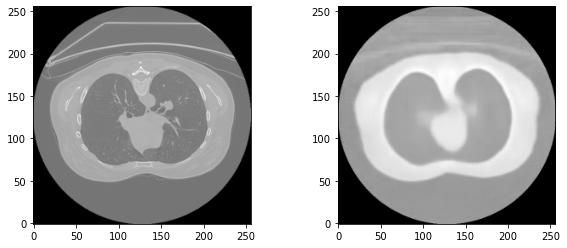

In [12]:
debug = True

encode.predict_model(train_files[1000:1001], checkpoint_path, img_shape=IMG_SHAPE, model_type=MODEL_TYPE)

In [8]:
debug = False 

descriptors = encode.get_descriptors_2d(train_files, checkpoint_path, debug=debug, model_type=MODEL_TYPE)
descriptors = np.array(descriptors)
print('descriptors shape: ', descriptors.shape)

C:\Users\Mary\anaconda3\envs\py36\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
descriptors shape:  (3617, 32)


In [10]:
OUT_PATH = 'F:/src/features/f_aec2d_new_half_size_0.2_256.txt'

with open(OUT_PATH,'w') as fout:
    for i, fp in enumerate(train_files):
        print(i, fp)
        fname = fp.split('/')[2]
        gender = fname[0]
        age = fname[1:3]
        pid = fname[4:]
        print(gender, age, pid)
        fout.write(gender + "," + age + "," + pid + "," )
        
        features = descriptors[i,:].astype(str)
        print(len(features))
        
        fout.write(",".join(features))
        fout.write('\n')

0 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_51.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
1 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_52.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
2 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_53.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
3 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_54.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
4 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_55.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
5 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_56.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
6 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_57.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa136a
32
7 F:/kt_dataset_dicom/F18_86dd1e4f-907b-147b-d41b-80a479aa136a/20061027/2_58.dcm
F 18 86dd1e4f-907b-147b-d41b-80a479aa

243 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_66.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
244 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_67.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
245 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_68.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
246 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_69.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
247 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_70.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
248 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_71.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
249 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_72.dcm
F 19 2a202543-4ba4-6b3d-1a68-6ae3aeec85d1
32
250 F:/kt_dataset_dicom/F19_2a202543-4ba4-6b3d-1a68-6ae3aeec85d1/20080529/2_73.dcm
F 19 2a202543-4ba4-6b

F 20 05a3e864-3813-247d-ac44-513edb43d983
32
443 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_63.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
444 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_64.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
445 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_65.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
446 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_66.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
447 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_67.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
448 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_68.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
449 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb43d983/20080402/2_69.dcm
F 20 05a3e864-3813-247d-ac44-513edb43d983
32
450 F:/kt_dataset_dicom/F20_05a3e864-3813-247d-ac44-513edb4

F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
662 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_50.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
663 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_51.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
664 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_52.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
665 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_53.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
666 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_54.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
667 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_55.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
668 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d181877/20060921/2_56.dcm
F 22 1bc64262-e95c-9c5f-2f08-97290d181877
32
669 F:/kt_dataset_dicom/F22_1bc64262-e95c-9c5f-2f08-97290d1

32
933 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_52.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
934 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_53.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
935 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_54.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
936 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_55.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
937 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_56.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
938 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_57.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
939 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_58.dcm
F 38 0d3930ab-9bd3-7fc6-730d-9ec49cdbf558
32
940 F:/kt_dataset_dicom/F38_0d3930ab-9bd3-7fc6-730d-9ec49cdbf558/20070503/2_59.dcm
F 38 0d3930ab-9bd3

F 40 3db6aace-7408-cc78-74fd-6377aa89f755
32
1218 F:/kt_dataset_dicom/F40_3db6aace-7408-cc78-74fd-6377aa89f755/20100726/2_59.dcm
F 40 3db6aace-7408-cc78-74fd-6377aa89f755
32
1219 F:/kt_dataset_dicom/F40_3db6aace-7408-cc78-74fd-6377aa89f755/20100726/2_60.dcm
F 40 3db6aace-7408-cc78-74fd-6377aa89f755
32
1220 F:/kt_dataset_dicom/F40_3db6aace-7408-cc78-74fd-6377aa89f755/20100726/2_61.dcm
F 40 3db6aace-7408-cc78-74fd-6377aa89f755
32
1221 F:/kt_dataset_dicom/F40_3db6aace-7408-cc78-74fd-6377aa89f755/20100726/2_62.dcm
F 40 3db6aace-7408-cc78-74fd-6377aa89f755
32
1222 F:/kt_dataset_dicom/F40_3ffea623-912b-51d1-ab98-1905eeb524e6/20070416/2_46.dcm
F 40 3ffea623-912b-51d1-ab98-1905eeb524e6
32
1223 F:/kt_dataset_dicom/F40_3ffea623-912b-51d1-ab98-1905eeb524e6/20070416/2_47.dcm
F 40 3ffea623-912b-51d1-ab98-1905eeb524e6
32
1224 F:/kt_dataset_dicom/F40_3ffea623-912b-51d1-ab98-1905eeb524e6/20070416/2_48.dcm
F 40 3ffea623-912b-51d1-ab98-1905eeb524e6
32
1225 F:/kt_dataset_dicom/F40_3ffea623-912b-51d1-ab98

F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1448 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_63.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1449 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_64.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1450 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_65.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1451 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_66.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1452 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_67.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1453 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_68.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1454 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d-33d4966b2679/20080909/2_69.dcm
F 41 8bf8f9da-f86d-7c02-d22d-33d4966b2679
32
1455 F:/kt_dataset_dicom/F41_8bf8f9da-f86d-7c02-d22d

32
1662 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_54.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1663 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_55.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1664 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_56.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1665 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_57.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1666 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_58.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1667 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_59.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1668 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_60.dcm
F 42 3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b
32
1669 F:/kt_dataset_dicom/F42_3affe6a1-b5c7-9eb9-2a95-c21b1cbca61b/20080414/2_61.dcm
F 42 3affe

1858 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_51.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1859 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_52.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1860 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_53.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1861 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_54.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1862 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_55.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1863 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_56.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1864 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_57.dcm
F 43 1e944cd4-f4ec-c15b-07cf-348dbef7ef3d
32
1865 F:/kt_dataset_dicom/F43_1e944cd4-f4ec-c15b-07cf-348dbef7ef3d/20070214/2_58.dcm
F 43 1e944cd4

32
2144 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_55.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2145 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_56.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2146 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_57.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2147 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_58.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2148 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_59.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2149 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_60.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2150 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_61.dcm
M 19 1e88b469-e307-b4c2-9e96-b5413c5b6000
32
2151 F:/kt_dataset_dicom/M19_1e88b469-e307-b4c2-9e96-b5413c5b6000/20080805/2_62.dcm
M 19 1e88b

32
2394 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_60.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2395 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_61.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2396 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_62.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2397 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_63.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2398 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_64.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2399 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_65.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2400 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_66.dcm
M 21 0e0b74ce-2579-4311-b3b0-bb6a4b0d690e
32
2401 F:/kt_dataset_dicom/M21_0e0b74ce-2579-4311-b3b0-bb6a4b0d690e/20070724/2_67.dcm
M 21 0e0b7

32
2630 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_40.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2631 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_41.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2632 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_42.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2633 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_43.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2634 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_44.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2635 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_45.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2636 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_46.dcm
M 22 04a4e3b0-4632-2cd5-736e-60bce2dadd19
32
2637 F:/kt_dataset_dicom/M22_04a4e3b0-4632-2cd5-736e-60bce2dadd19/20060829/2_47.dcm
M 22 04a4e

32
2837 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_126.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2838 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_127.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2839 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_128.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2840 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_129.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2841 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_130.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2842 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_131.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2843 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/20090930/102_132.dcm
M 38 2fe2eecc-69d4-ad9d-ad78-66188114213a
32
2844 F:/kt_dataset_dicom/M38_2fe2eecc-69d4-ad9d-ad78-66188114213a/2009093

3113 F:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_78.dcm
M 40 1e1b18e0-9262-a825-b977-9fd584cf4984
32
3114 F:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_79.dcm
M 40 1e1b18e0-9262-a825-b977-9fd584cf4984
32
3115 F:/kt_dataset_dicom/M40_1e1b18e0-9262-a825-b977-9fd584cf4984/20070628/2_80.dcm
M 40 1e1b18e0-9262-a825-b977-9fd584cf4984
32
3116 F:/kt_dataset_dicom/M40_1f3a322d-8750-d3eb-64fe-738d317ccc96/20060825/2_47.dcm
M 40 1f3a322d-8750-d3eb-64fe-738d317ccc96
32
3117 F:/kt_dataset_dicom/M40_1f3a322d-8750-d3eb-64fe-738d317ccc96/20060825/2_48.dcm
M 40 1f3a322d-8750-d3eb-64fe-738d317ccc96
32
3118 F:/kt_dataset_dicom/M40_1f3a322d-8750-d3eb-64fe-738d317ccc96/20060825/2_49.dcm
M 40 1f3a322d-8750-d3eb-64fe-738d317ccc96
32
3119 F:/kt_dataset_dicom/M40_1f3a322d-8750-d3eb-64fe-738d317ccc96/20060825/2_50.dcm
M 40 1f3a322d-8750-d3eb-64fe-738d317ccc96
32
3120 F:/kt_dataset_dicom/M40_1f3a322d-8750-d3eb-64fe-738d317ccc96/20060825/2_51.dcm
M 40 1f3a322d

32
3324 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_63.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3325 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_64.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3326 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_65.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3327 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_66.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3328 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_67.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3329 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_68.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3330 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_69.dcm
M 42 fe6a067a-fcc0-644c-ba6e-c36eb636eefb
32
3331 F:/kt_dataset_dicom/M42_fe6a067a-fcc0-644c-ba6e-c36eb636eefb/20100429/2_70.dcm
M 42 fe6a0

32
3532 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_59.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3533 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_60.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3534 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_61.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3535 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_62.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3536 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_63.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3537 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_64.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3538 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_65.dcm
M 43 1a2cdd01-7926-7c36-8079-27276e7455a2
32
3539 F:/kt_dataset_dicom/M43_1a2cdd01-7926-7c36-8079-27276e7455a2/20110111/2_66.dcm
M 43 1a2cd

In [ ]:
# #check category balance
# from collections import defaultdict
# dictionary = {}

# for file in val_files:
#     fname = file.split('/')[2]
#     sex_age = fname[:3]
#     if sex_age not in dictionary:
#         dictionary[sex_age] = 0
#     else:
#         dictionary[sex_age] += 1
# print(dictionary)

In [71]:
train_files_id = []
i = 0

for cat in cat_list:
    for file in dicom_files_id:
        if(file[:3] == cat and i < 8):
            train_files_id.append(file)
            i += 1
    i = 0

In [33]:
cat_list = ['F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43']